In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
results_path = "./models/Reinforce_One_Dataset/"
datasets = list(map(os.path.basename, glob.glob(r"OneDatasetLearning/Classification/*")))

In [4]:
cv = ['train', 'test']

glob.glob(results_path + "*")
all_results = [(pd.read_csv(x, index_col=0), os.path.basename(x)) for x in glob.glob(results_path + "*")]

for curr_result_df, name in all_results:
    curr_result_df['delta_param'] = curr_result_df['new_param'] / curr_result_df['origin_param']
    curr_result_df['delta_acc'] = curr_result_df['new_acc'] - curr_result_df['origin_acc']

In [6]:
relevant_results = list(filter(lambda x: 'with_loop' in x[1], all_results))

In [40]:
relevant_results_tuples = list(zip(relevant_results, list(map(lambda a : list(filter(lambda x: x[1] == a[1].replace("_with_loop", ""), all_results))[0], relevant_results))))

In [53]:
relevant_results_tuples_train = list(filter(lambda x: 'train' in x[1][1], relevant_results_tuples))
relevant_results_tuples_test = list(filter(lambda x: 'test' in x[1][1], relevant_results_tuples))

In [17]:
with_loop_and_without_loop_path = list(zip(list(map(lambda x: x[1].replace("_with_loop", '')), relevant_results))

In [56]:
all_features = []
all_sizes = []

for curr_d in datasets:
    s, f = pd.read_csv(f'OneDatasetLearning/Classification/{curr_d}/{curr_d}.csv').shape
    all_sizes.append(s)
    all_features.append(f)


In [57]:
dataset_to_feature_size = dict([(x, all_features[idx]) for idx, x in enumerate(datasets)])
dataset_to_size = dict([(x, all_sizes[idx]) for idx, x in enumerate(datasets)])

In [61]:
relevant_results_tuples_train[0][0][0]

model  new_acc  origin_acc  \
0   ./OneDatasetLearning/Classification/mfeat-karh...   0.9775      0.9775   
1   ./OneDatasetLearning/Classification/mfeat-karh...   0.8625      0.8625   
2   ./OneDatasetLearning/Classification/mfeat-karh...   0.9800      0.9800   
3   ./OneDatasetLearning/Classification/mfeat-karh...   0.4100      0.4100   
4   ./OneDatasetLearning/Classification/mfeat-karh...   0.9800      0.9800   
5   ./OneDatasetLearning/Classification/mfeat-karh...   0.2850      0.2850   
6   ./OneDatasetLearning/Classification/mfeat-karh...   0.9175      0.9175   
7   ./OneDatasetLearning/Classification/mfeat-karh...   0.8375      0.8375   
8   ./OneDatasetLearning/Classification/mfeat-karh...   0.1100      0.1100   
9   ./OneDatasetLearning/Classification/mfeat-karh...   0.5375      0.5375   
10  ./OneDatasetLearning/Classification/mfeat-karh...   0.9775      0.9775   
11  ./OneDatasetLearning/Classification/mfeat-karh...   0.9725      0.9725   
12  ./OneDatasetLearning/Classification/mfeat-karh...   0.1400      0.1400   
13  ./OneDatasetLearning/Classification/mfeat-karh...   0.9850      0.9850   
14  ./OneDatasetLearning/Classification/mfeat-karh...   0.0875      0.0875   
15  ./OneDatasetLearning/Classification/mfeat-karh...   0.9025      0.9025   
16  ./OneDatasetLearning/Classification/mfeat-karh...   0.9875      0.9875   
17  ./OneDatasetLearning/Classification/mfeat-karh...   0.9725      0.9725   
18  ./OneDatasetLearning/Classification/mfeat-karh...   0.9775      0.9775   
19  ./OneDatasetLearning/Classification/mfeat-karh...   0.9775      0.9775   
20  ./OneDatasetLearning/Classification/mfeat-karh...   0.9825      0.9825   
21  ./OneDatasetLearning/Classification/mfeat-karh...   0.2275      0.2275   
22  ./OneDatasetLearning/Classification/mfeat-karh...   0.9800      0.9800   
23  ./OneDatasetLearning/Classification/mfeat-karh...   0.9850      0.9850   

    new_param  origin_param  \
0     2464210       2464210   
1     2353738       2353738   
2      206238        206238   
3      384010        384010   
4      477538        477538   
5      116610        116610   
6        7510          7510   
7     1310210       1310210   
8     1748010       1748010   
9      846210        846210   
10     166110        166110   
11     202910        202910   
12      76710         76710   
13    1516338       1516338   
14    2390810       2390810   
15      22510         22510   
16     571038        571038   
17     625038        625038   
18     296910        296910   
19      45010         45010   
20     229810        229810   
21     328710        328710   
22      15138         15138   
23     330038        330038   

                                       new_model_arch  \
0   [(64, 800), (800, 1000), (1000, 1000), (1000, ...   
1   [(64, 900), (900, 1000), (1000, 700), (700, 40...   
2                  [(64, 300), (300, 600), (600, 10)]   
3   [(64, 300), (300, 100), (100, 100), (100, 800)...   
4   [(64, 400), (400, 100), (100, 400), (400, 900)...   
5                  [(64, 700), (700, 100), (100, 10)]   
6                              [(64, 100), (100, 10)]   
7   [(64, 800), (800, 100), (100, 700), (700, 1000...   
8   [(64, 500), (500, 900), (900, 700), (700, 700)...   
9   [(64, 400), (400, 600), (600, 700), (700, 100)...   
10               [(64, 1000), (1000, 100), (100, 10)]   
11                 [(64, 200), (200, 900), (900, 10)]   
12                 [(64, 200), (200, 300), (300, 10)]   
13   [(64, 1000), (1000, 800), (800, 800), (800, 10)]   
14  [(64, 1000), (1000, 800), (800, 1000), (1000, ...   
15                             [(64, 300), (300, 10)]   
16     [(64, 400), (400, 900), (900, 200), (200, 10)]   
17  [(64, 200), (200, 600), (600, 300), (300, 1000...   
18                 [(64, 800), (800, 300), (300, 10)]   
19                             [(64, 600), (600, 10)]   
20     [(64, 200), (200, 300), (300, 500), (500, 10)]   
21  [(64, 500), (500, 400), (400, 100), (100, 500)...   
22        

/home/liorhi/.conda/envs/liorhi_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


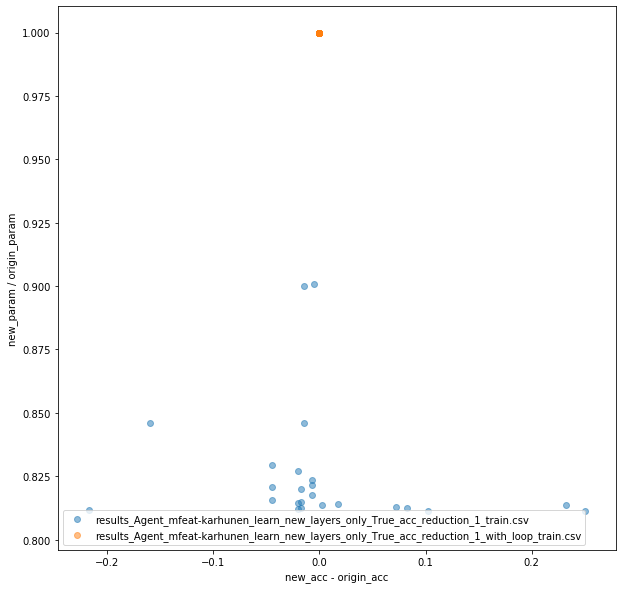

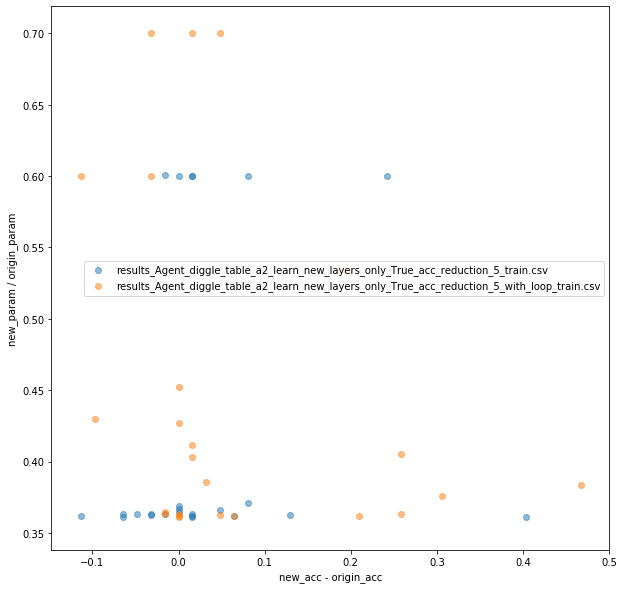

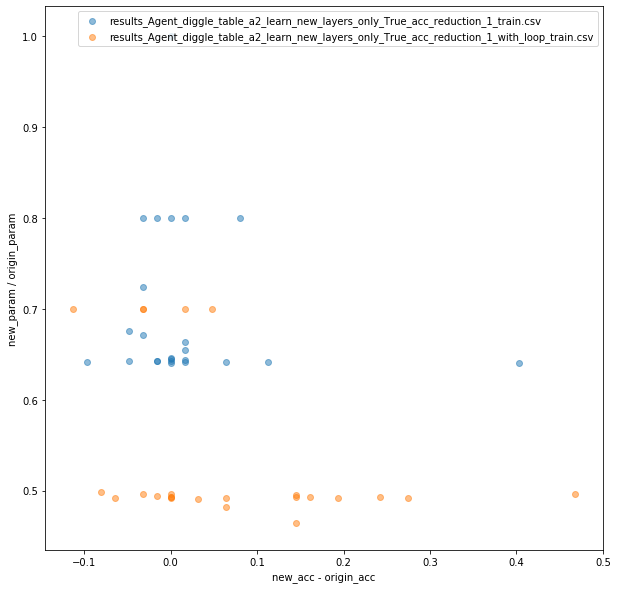

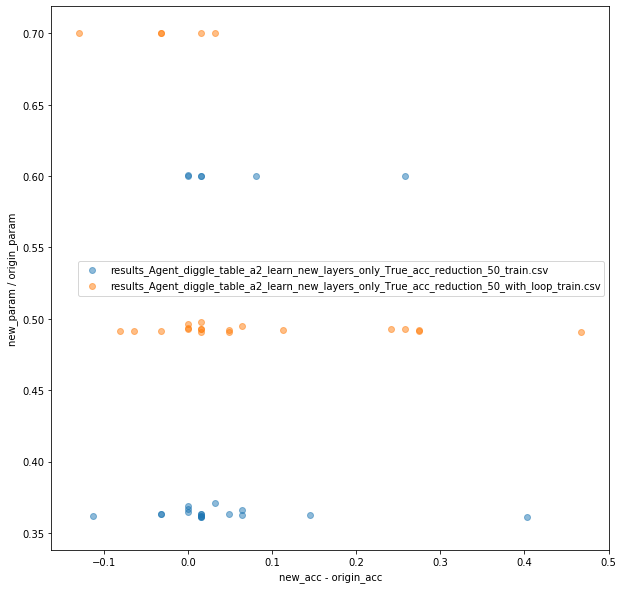

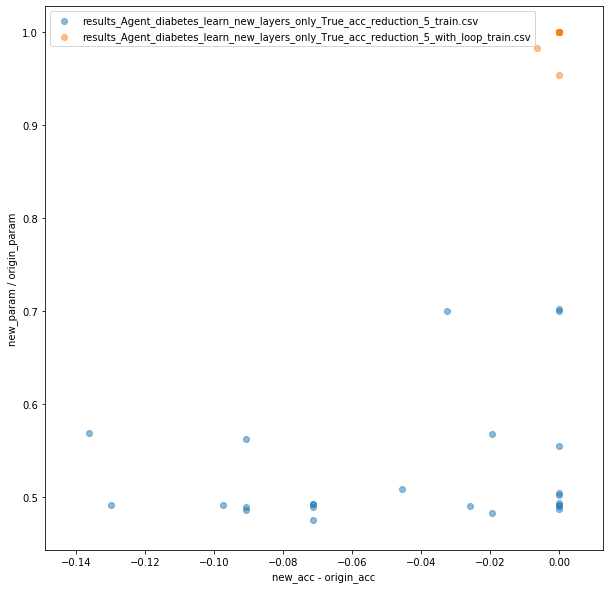

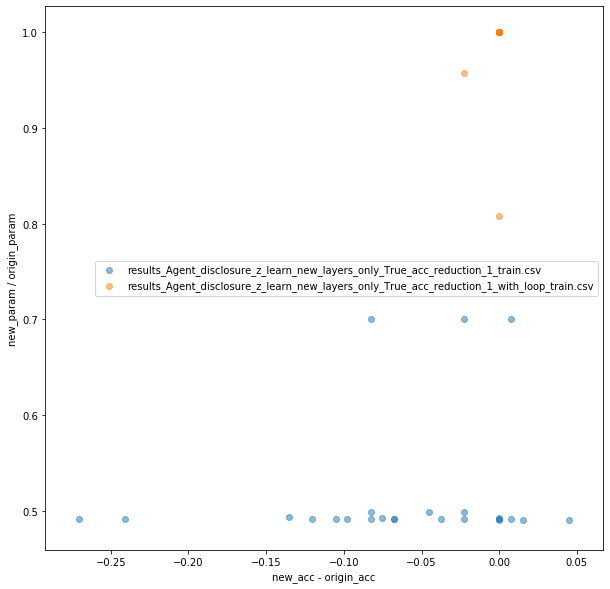

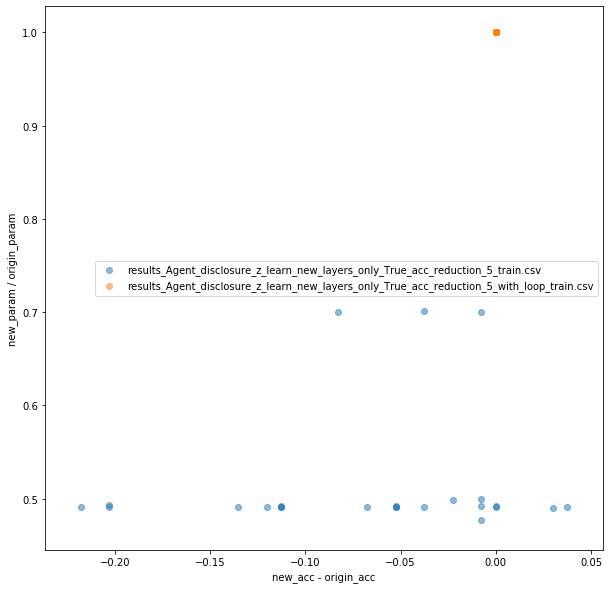

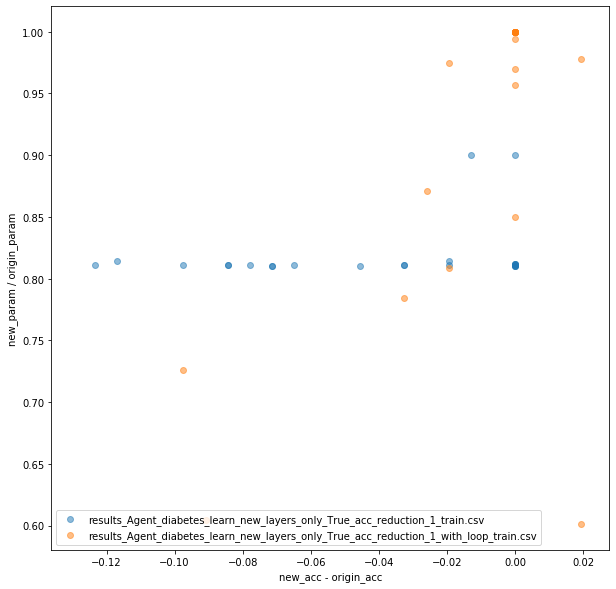

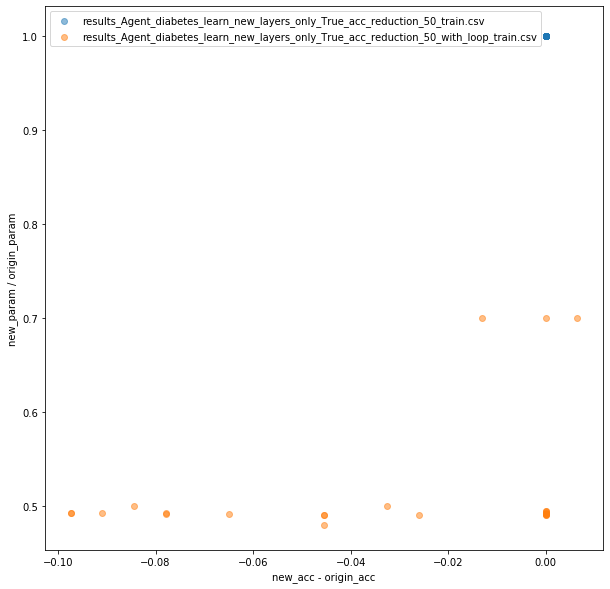

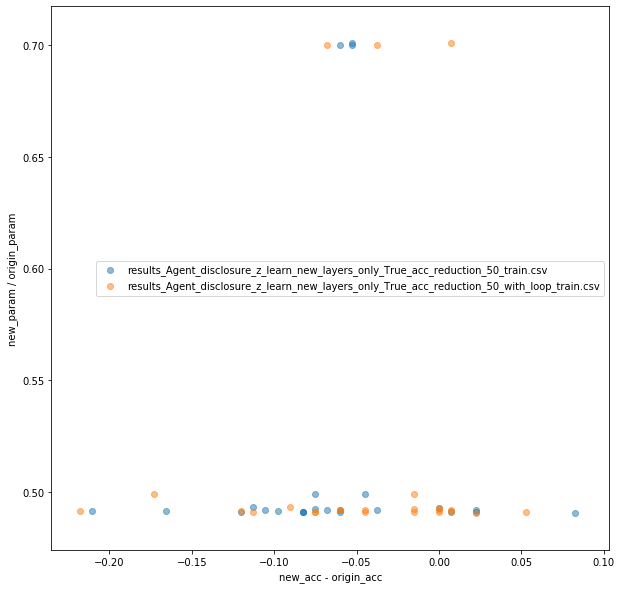

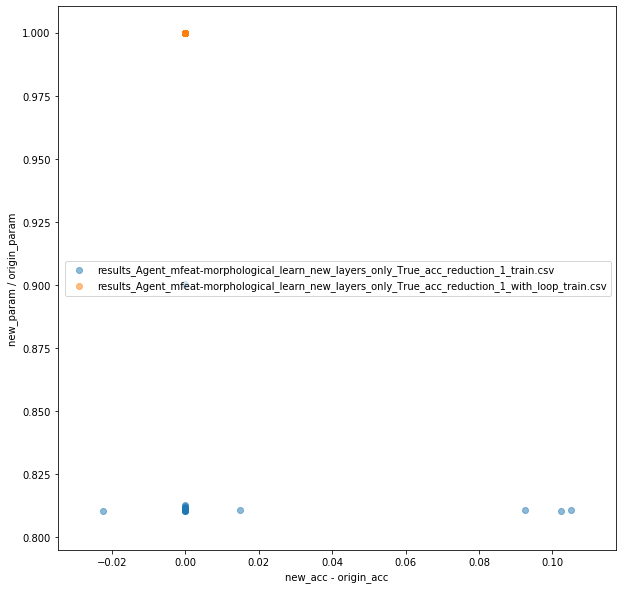

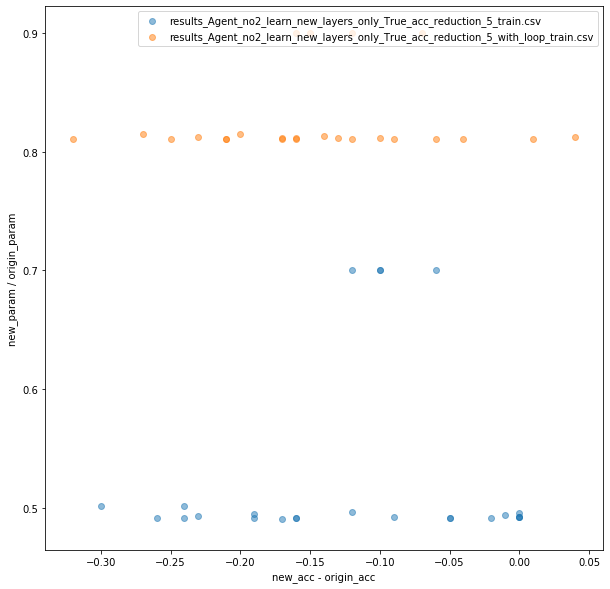

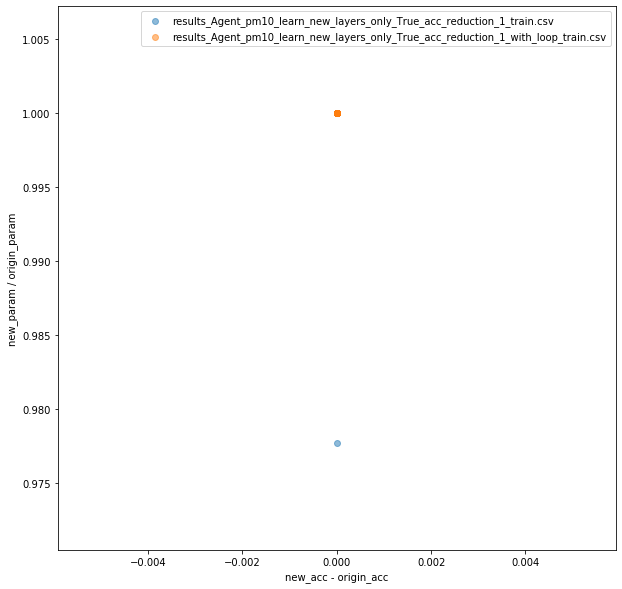

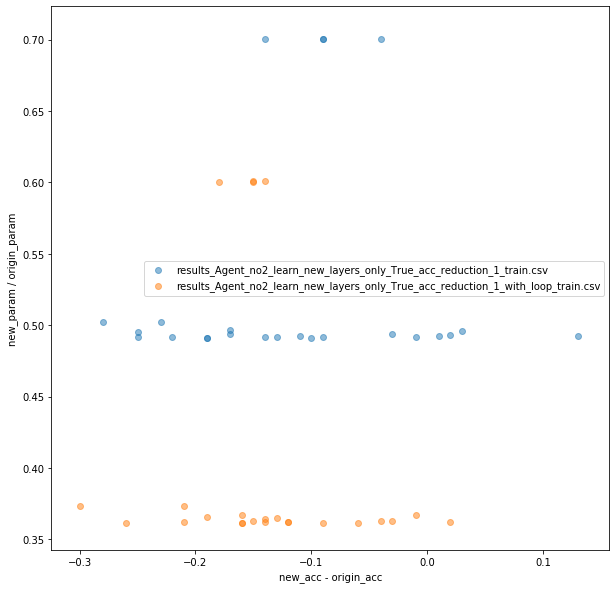

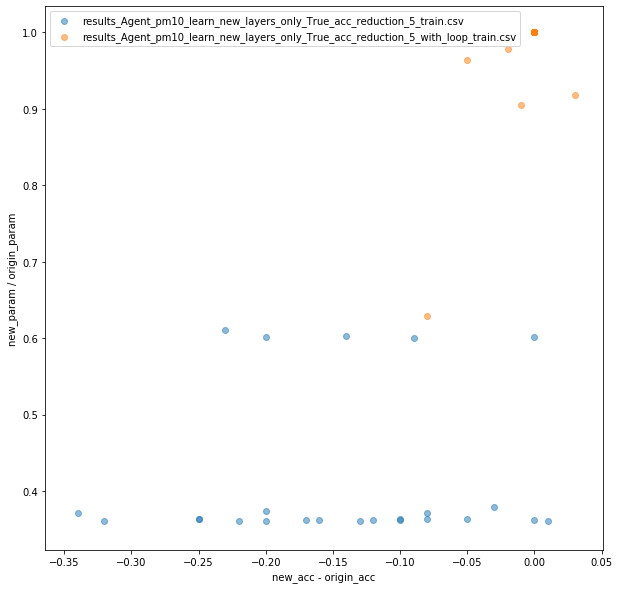

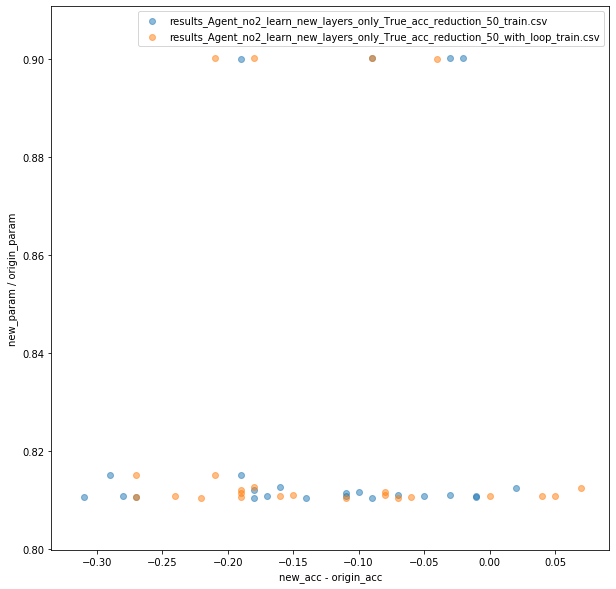

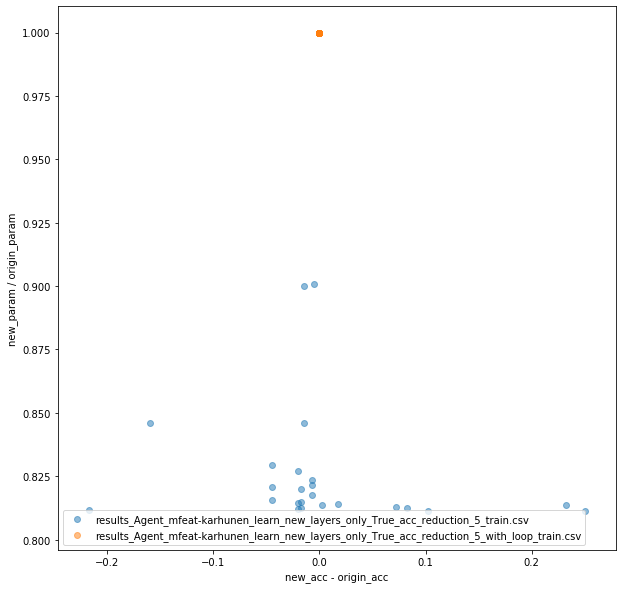

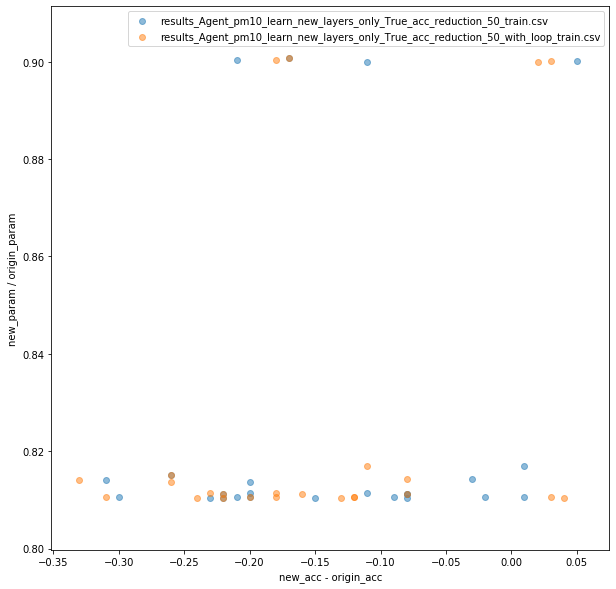

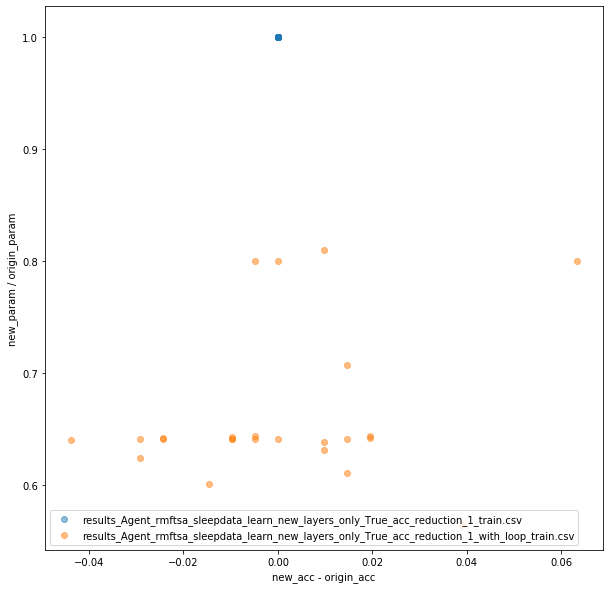

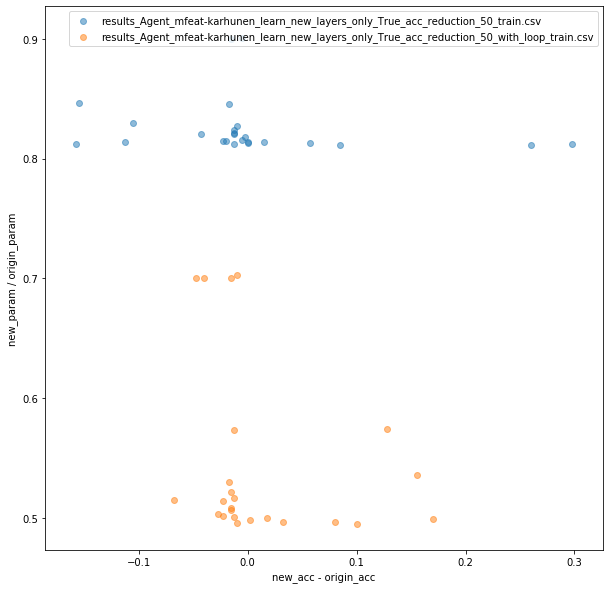

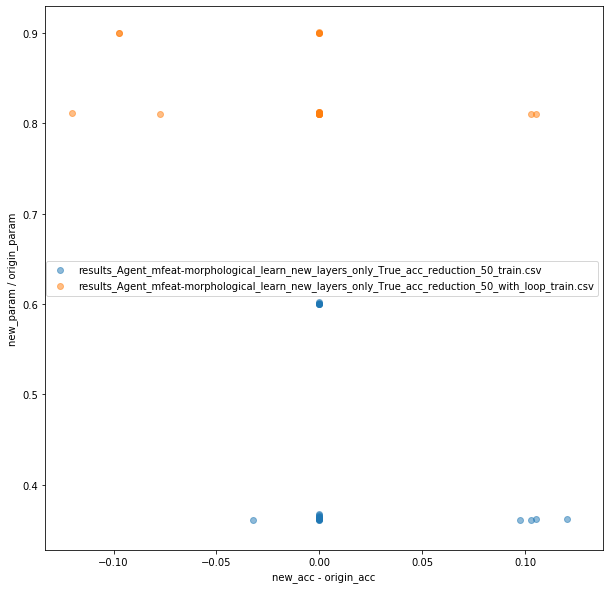

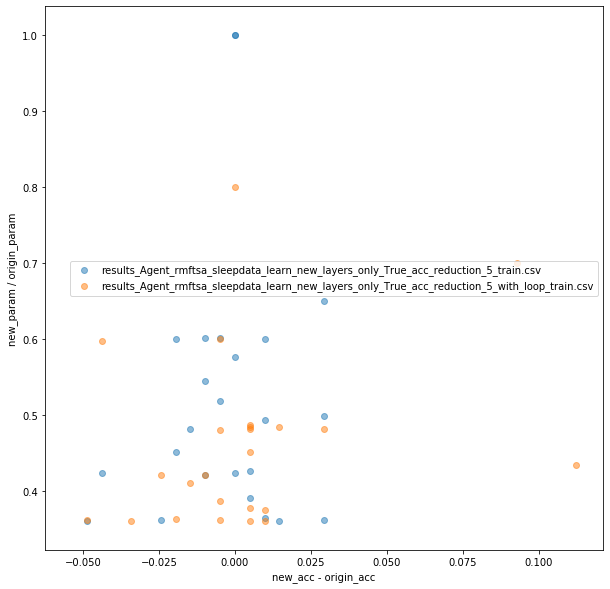

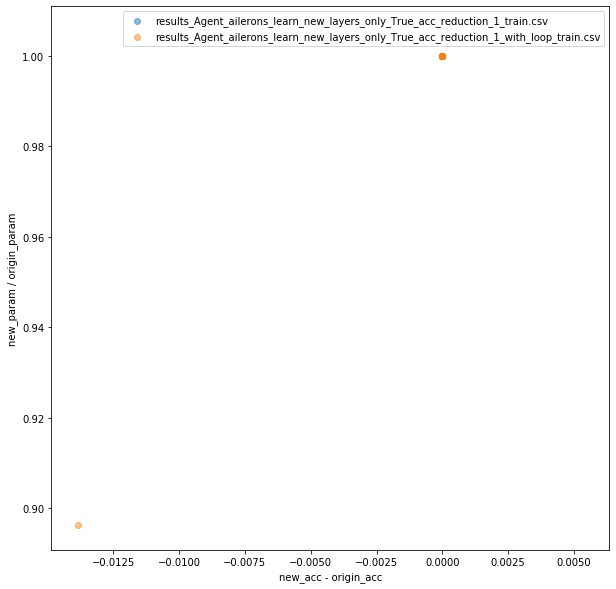

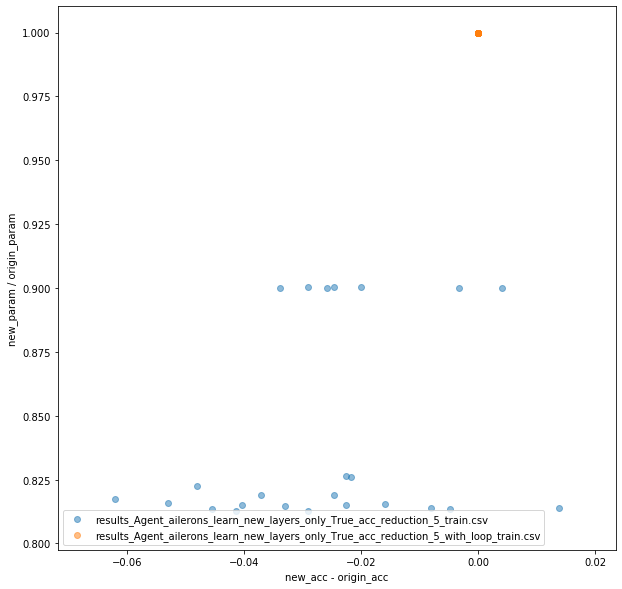

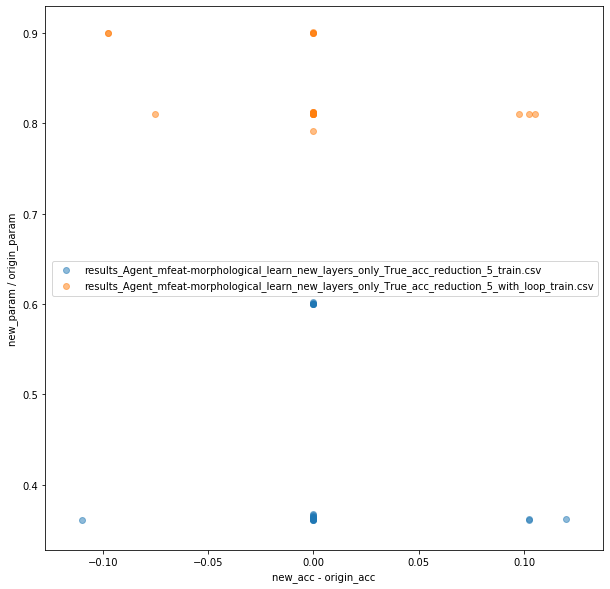

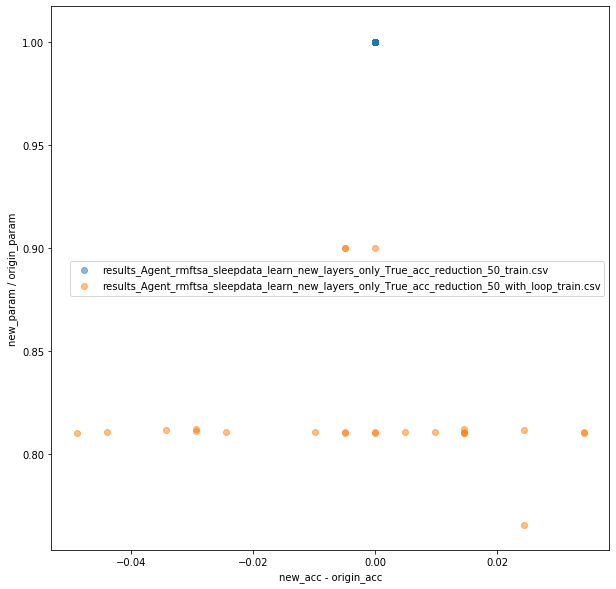

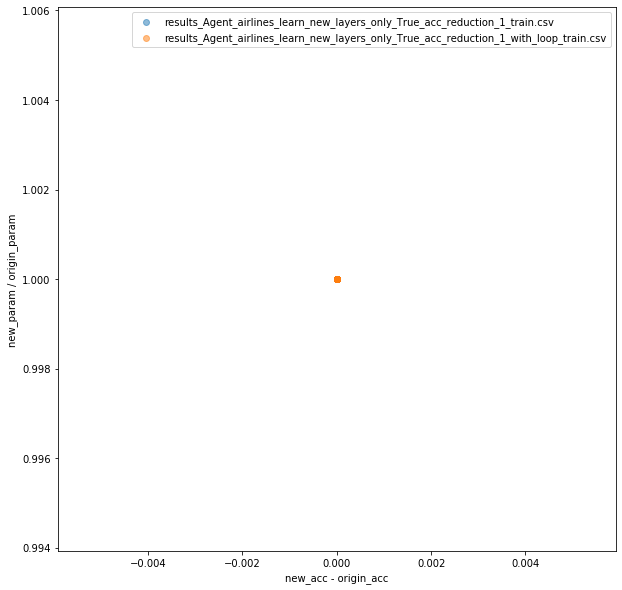

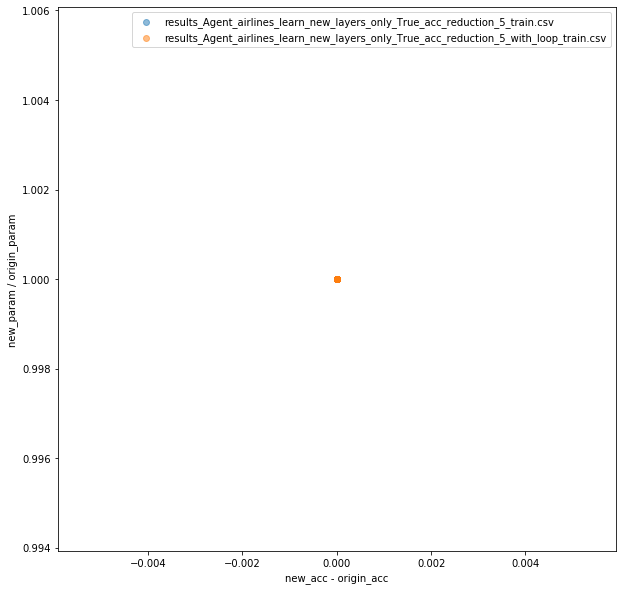

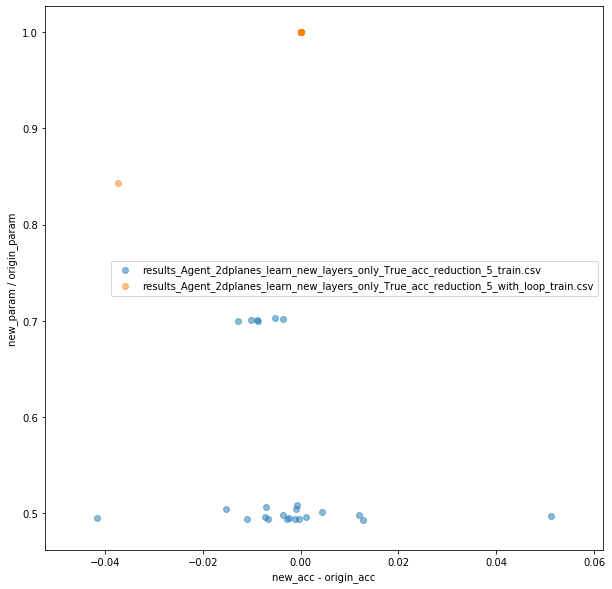

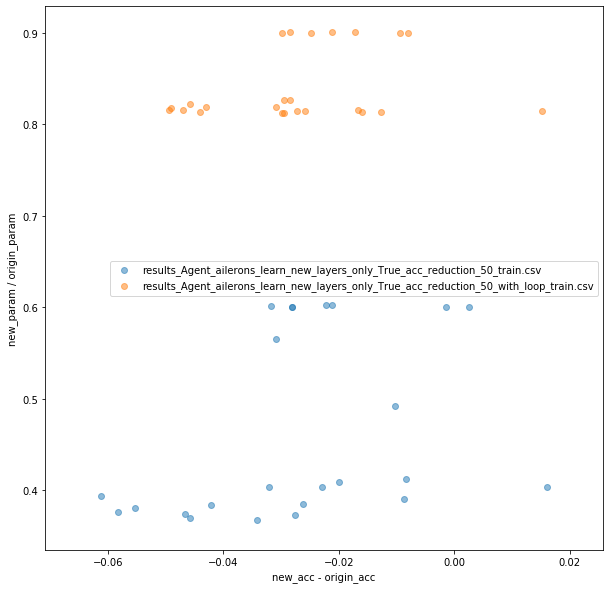

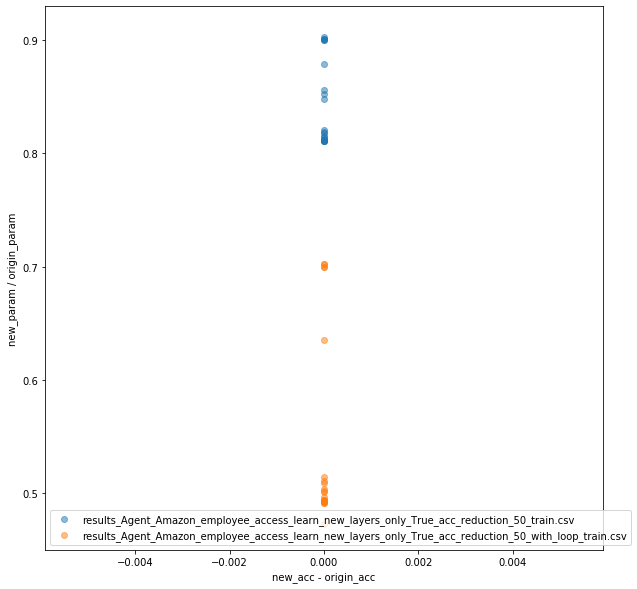

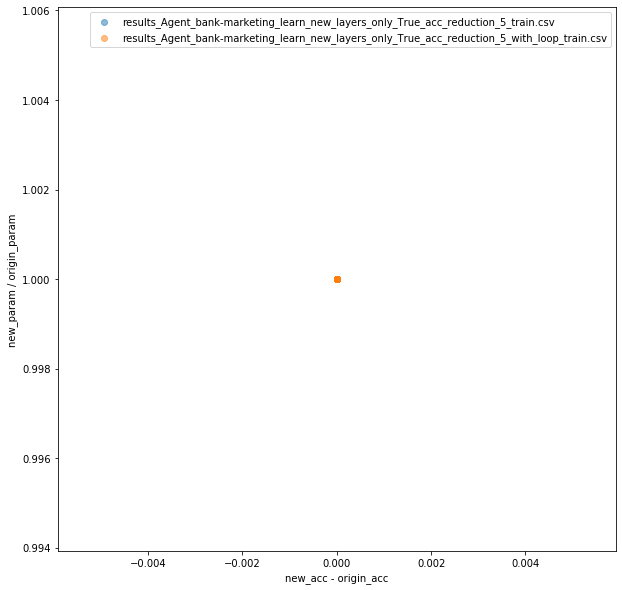

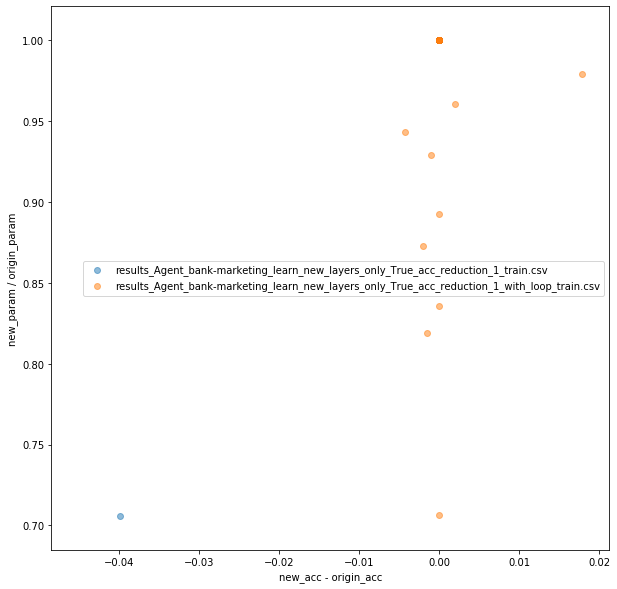

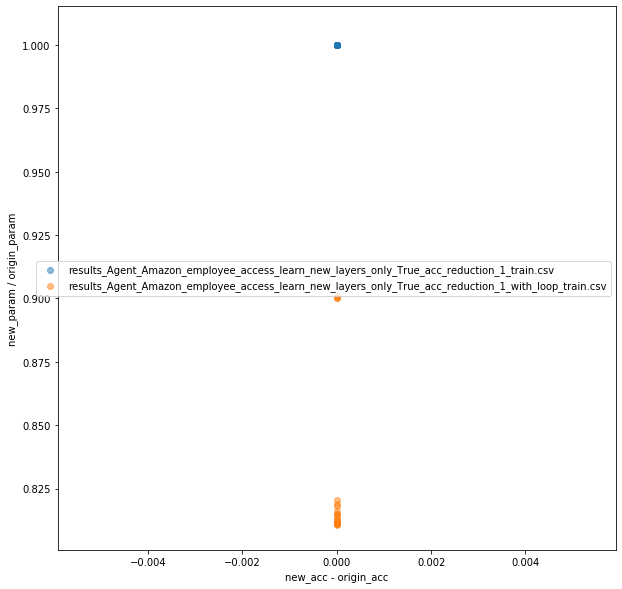

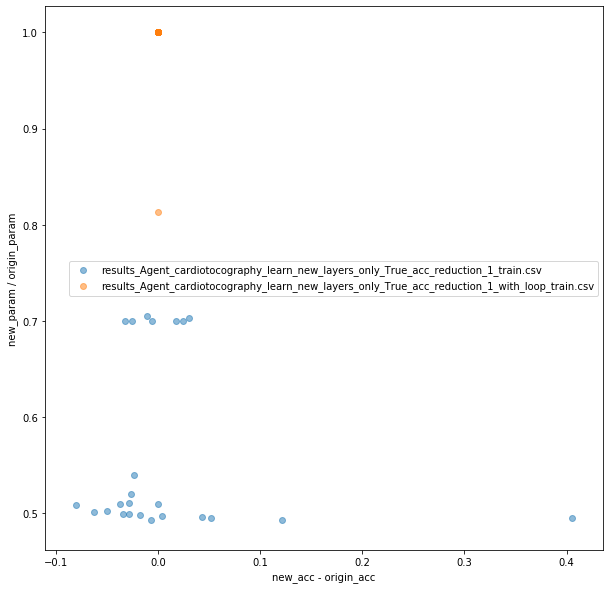

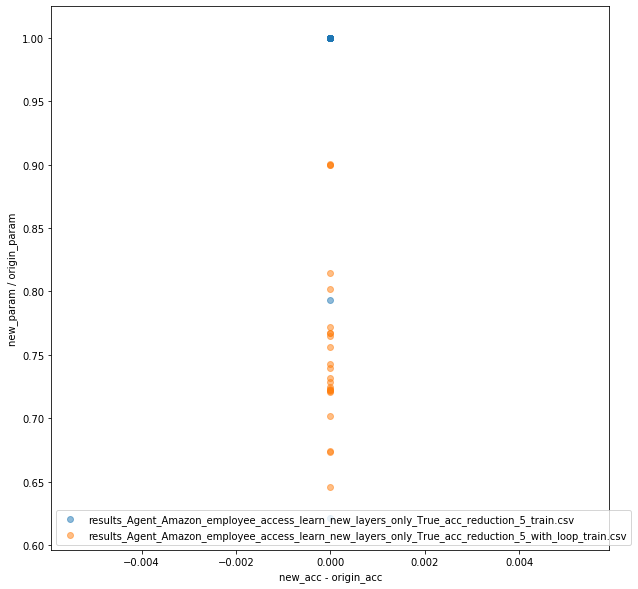

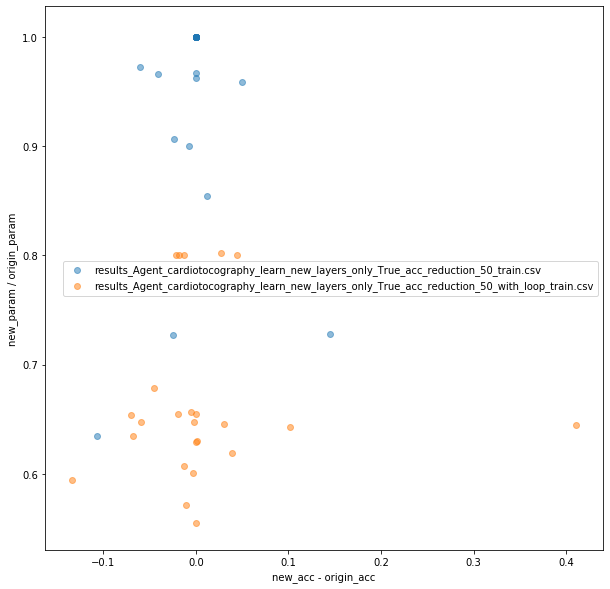

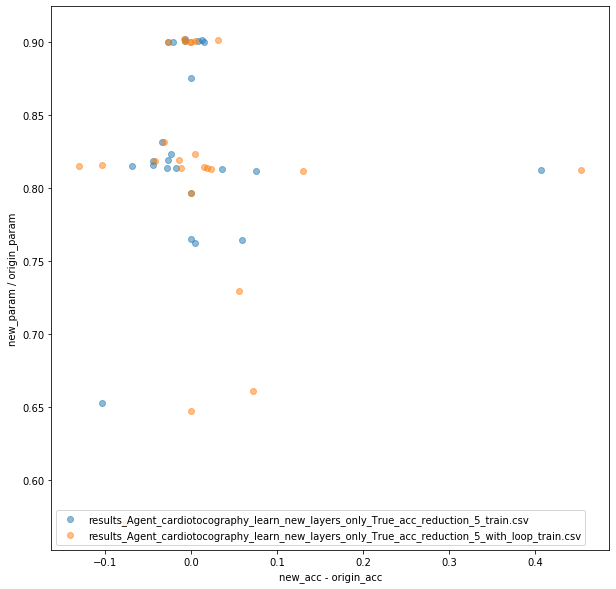

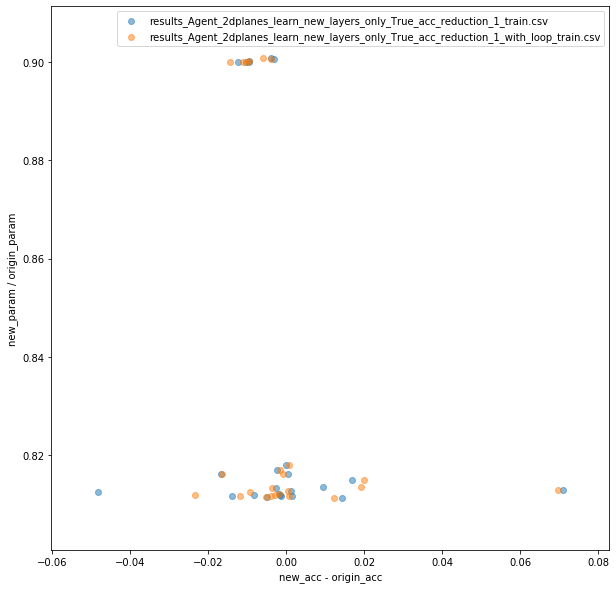

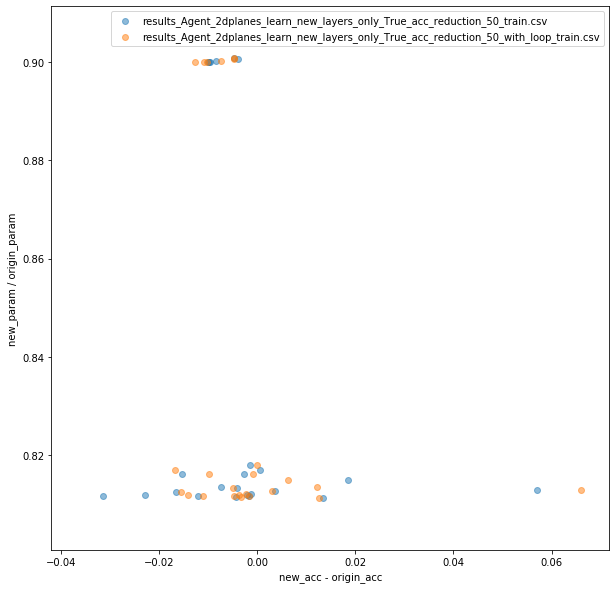

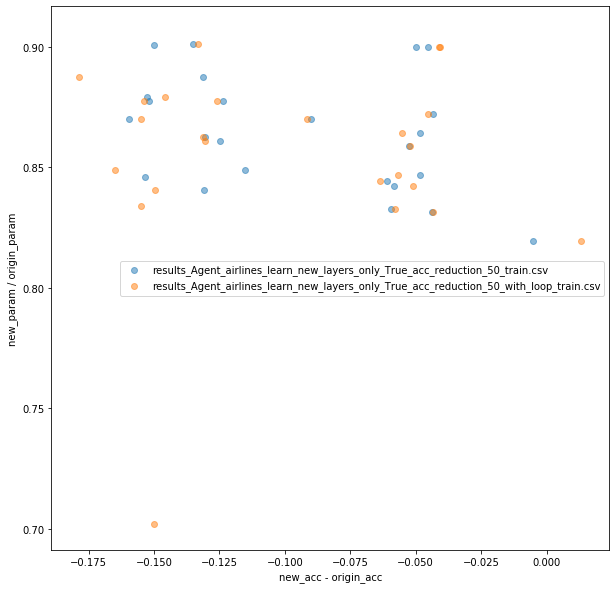

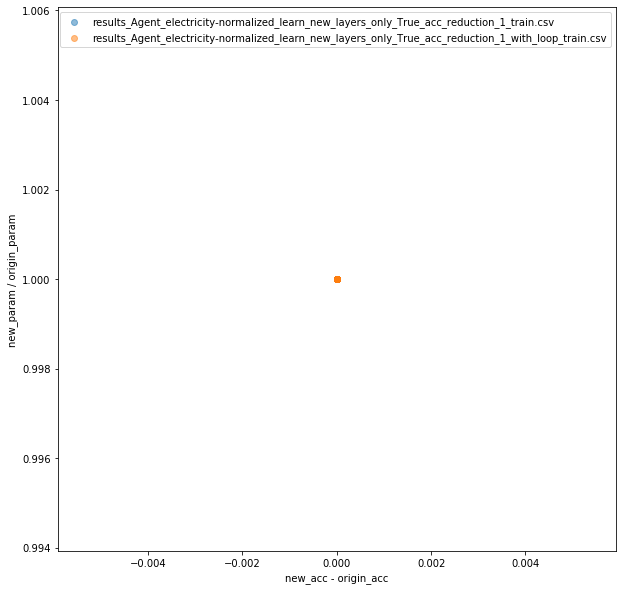

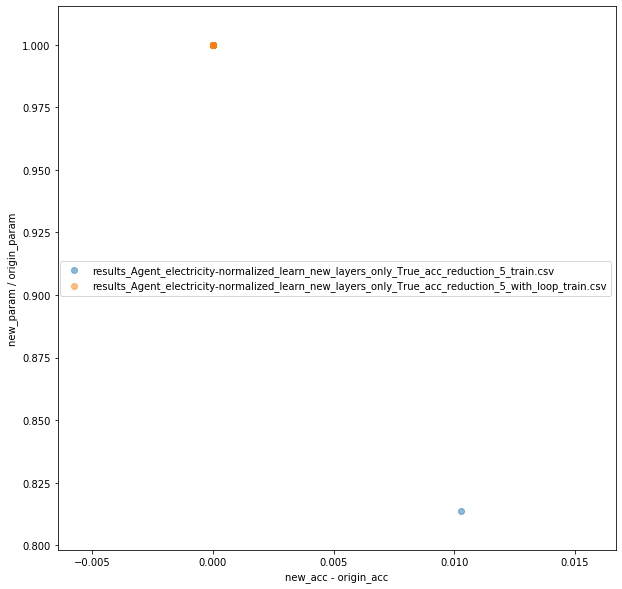

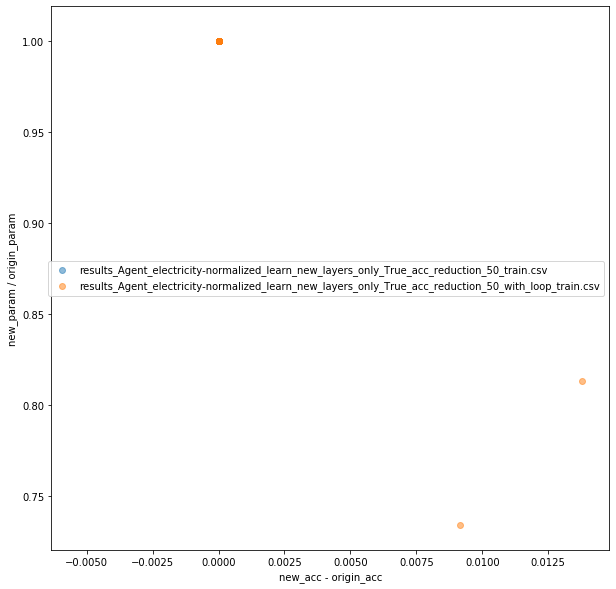

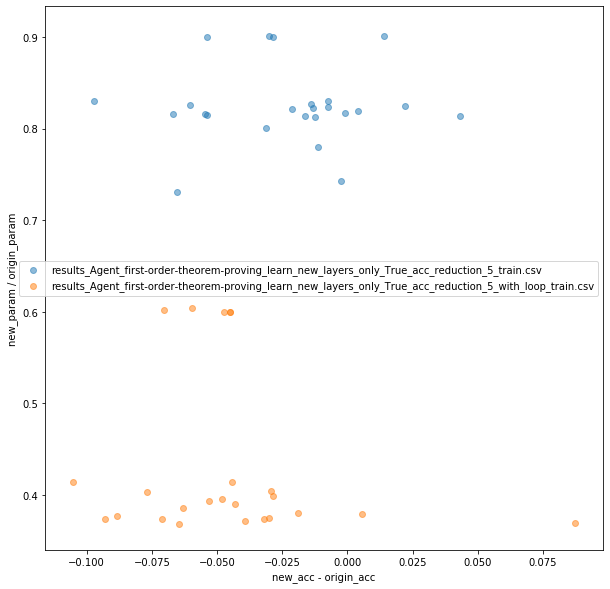

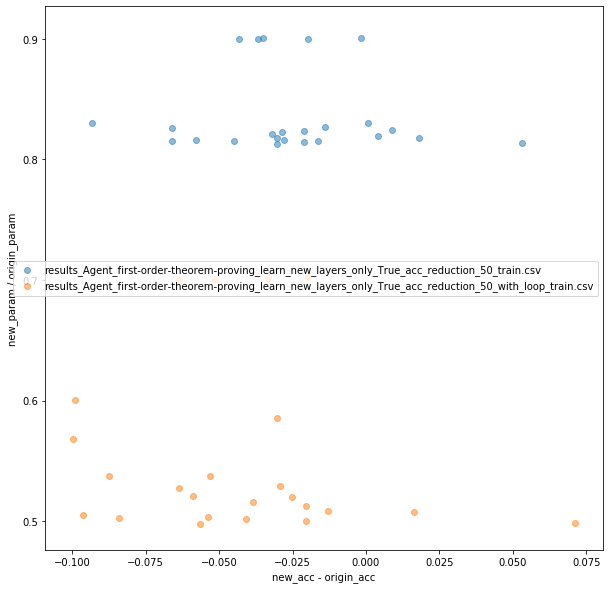

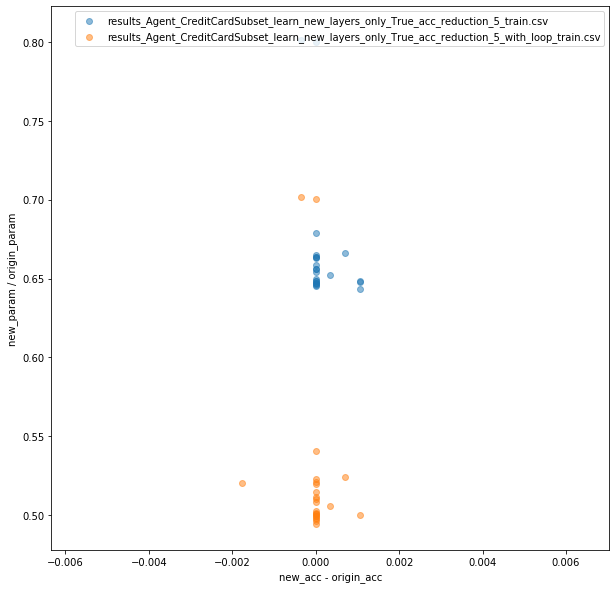

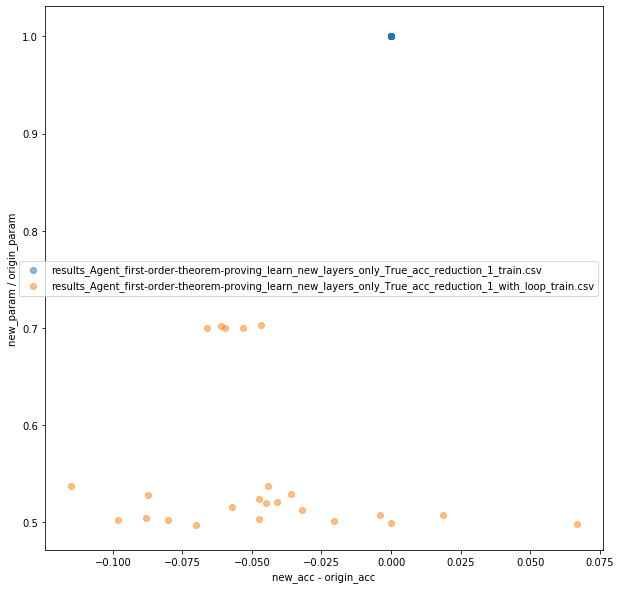

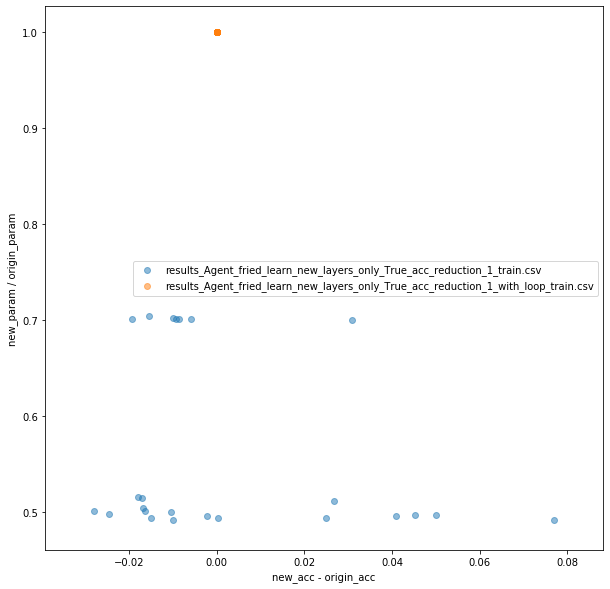

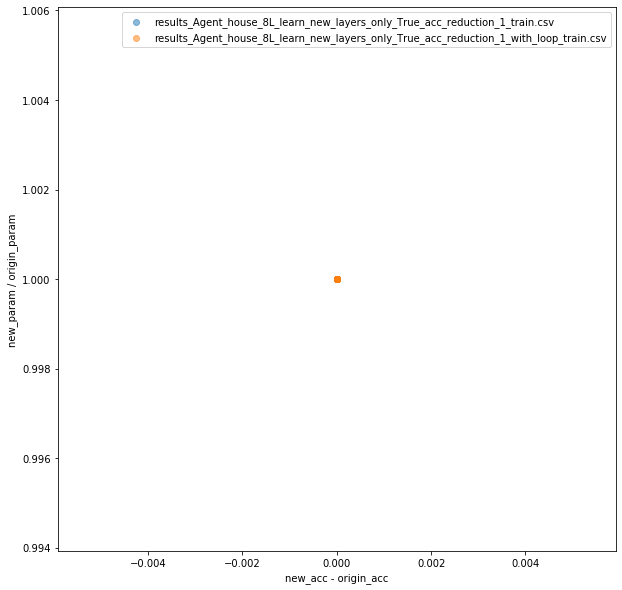

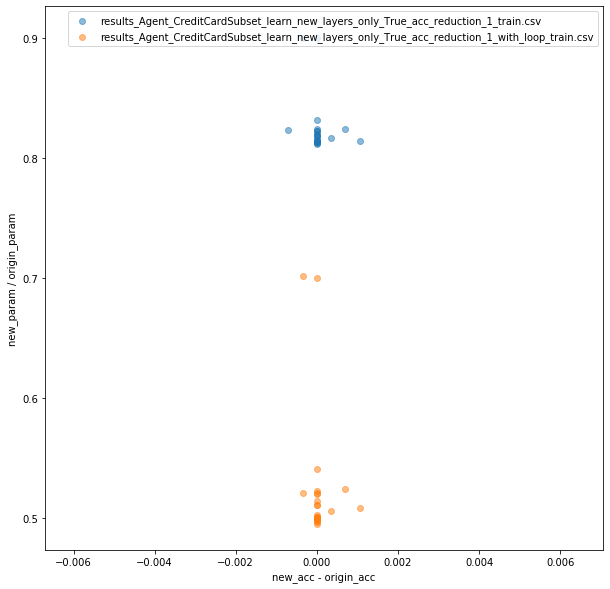

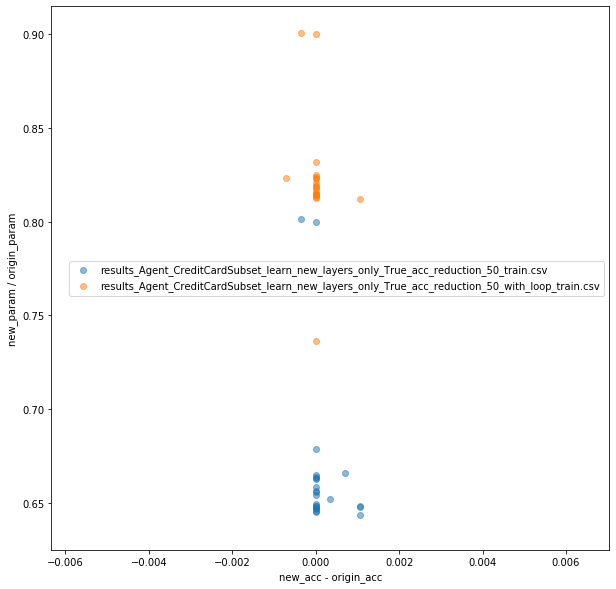

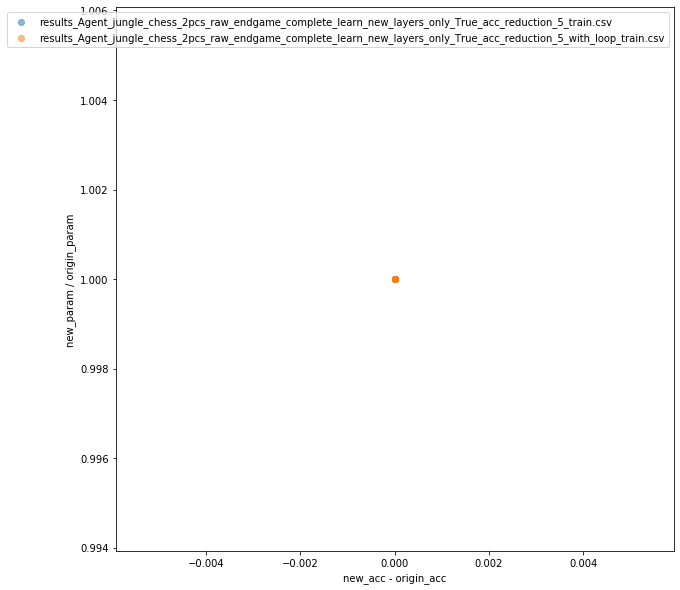

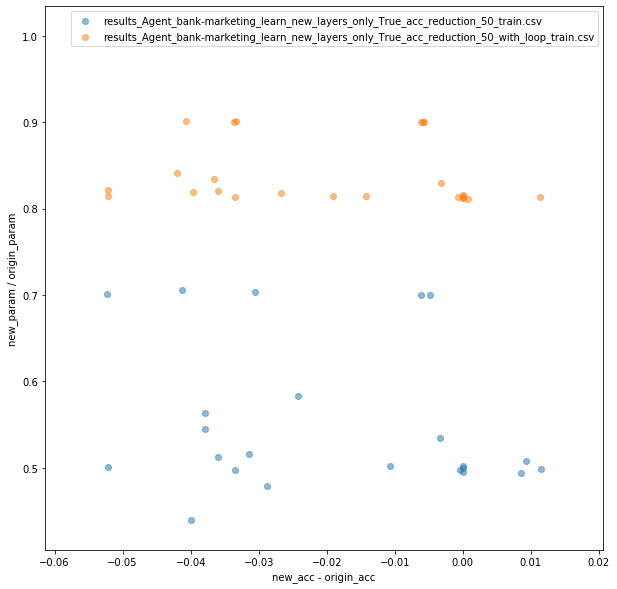

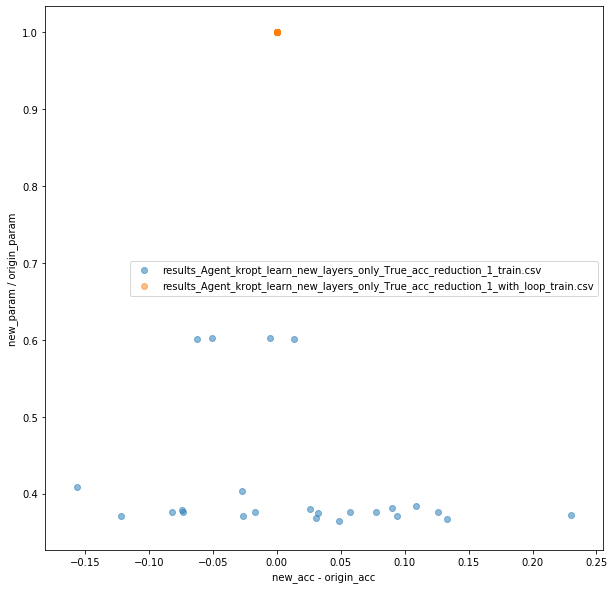

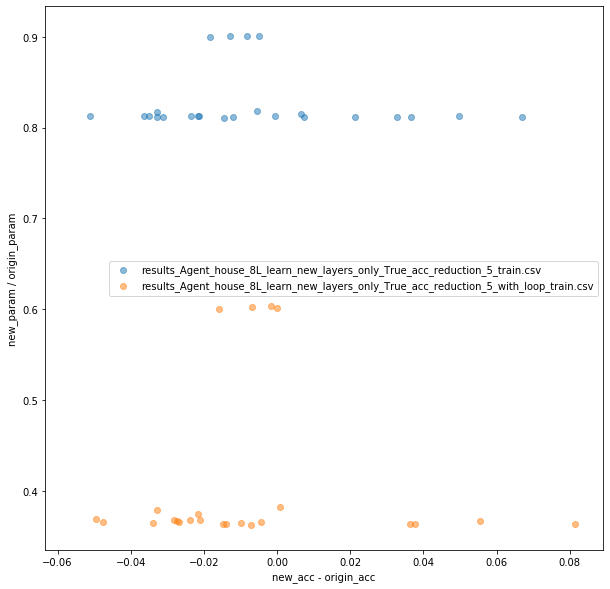

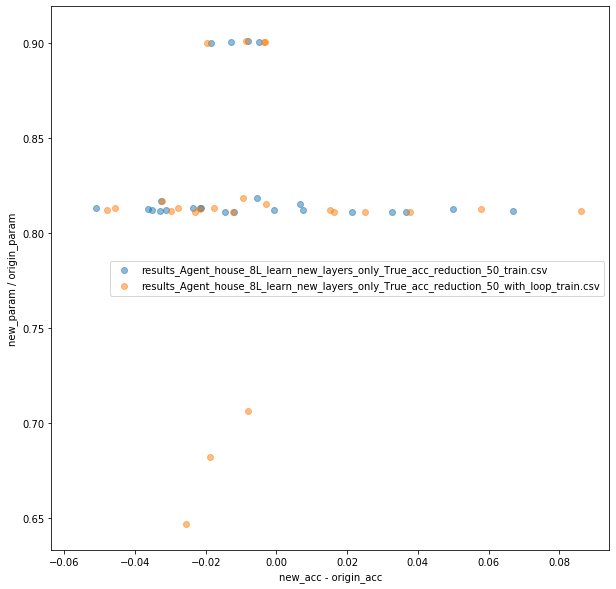

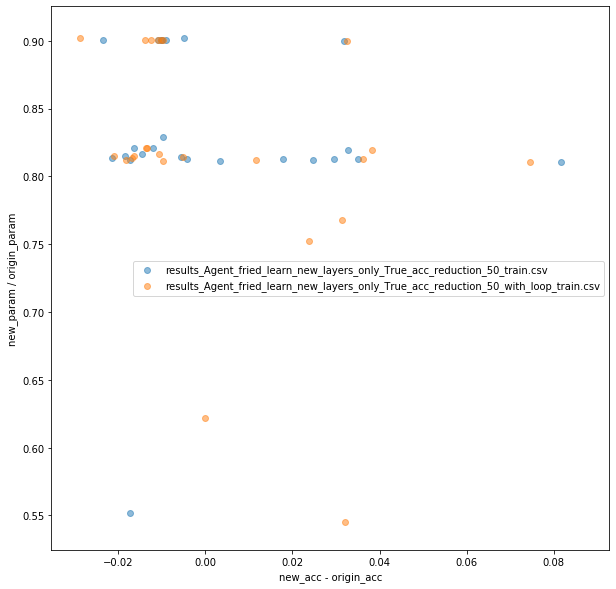

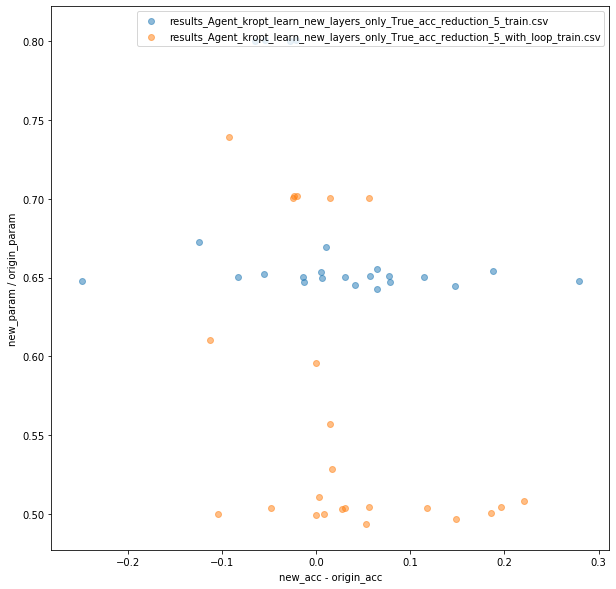

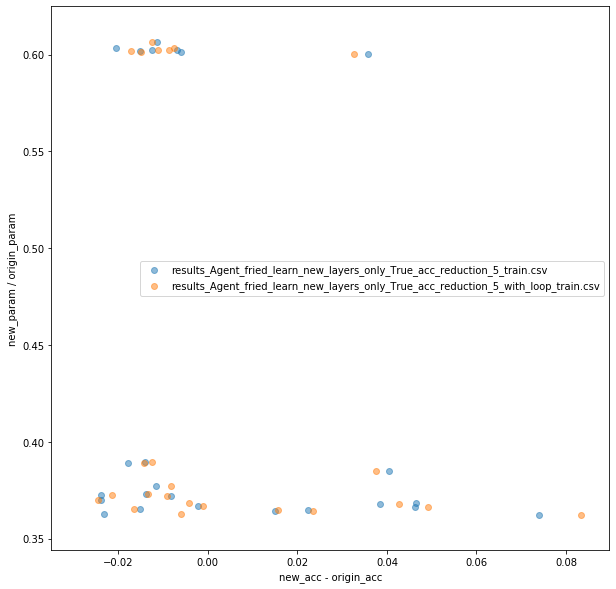

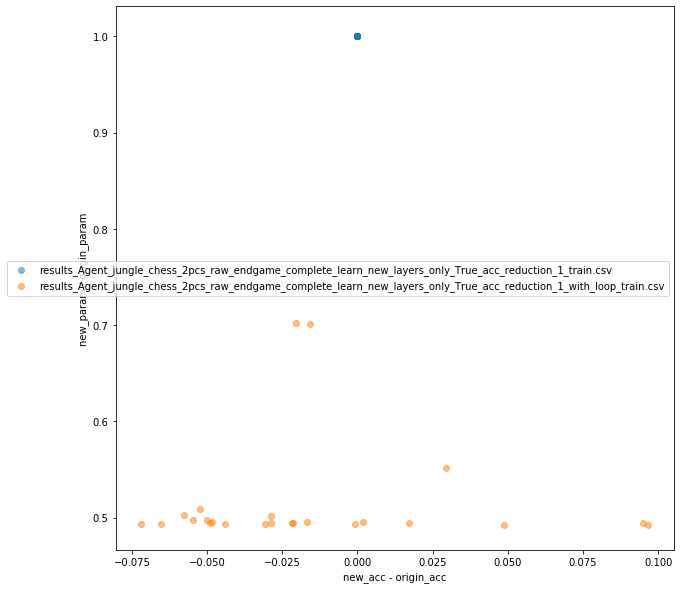

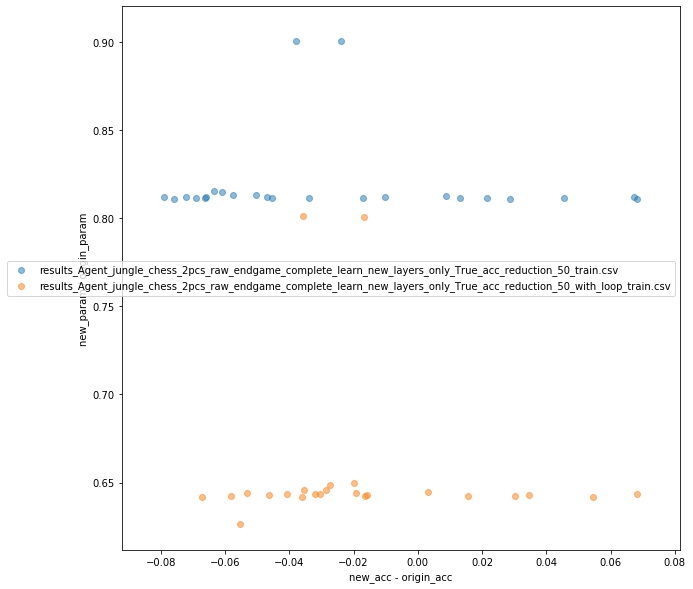

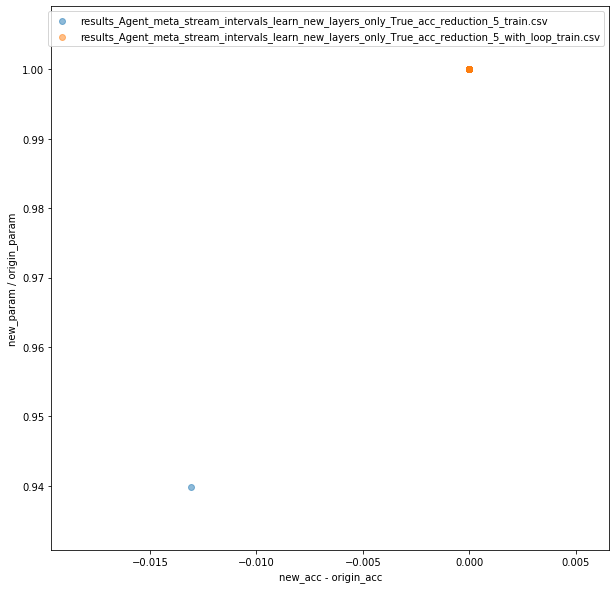

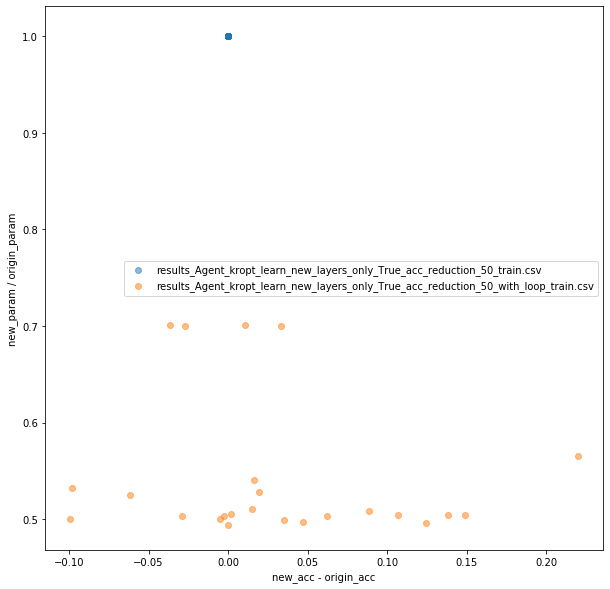

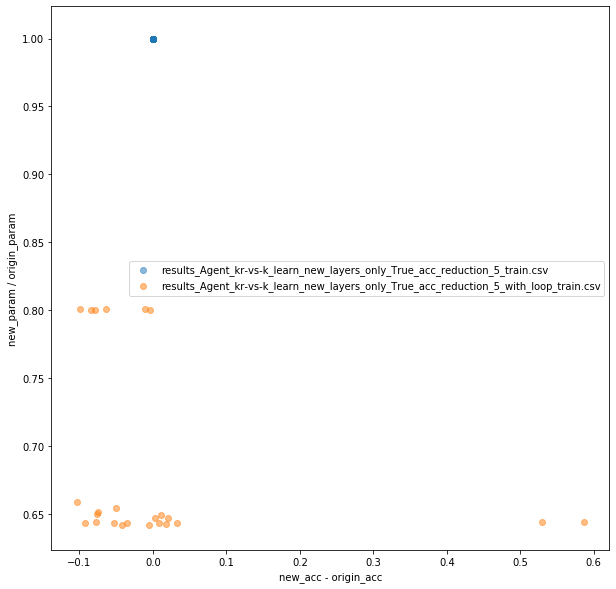

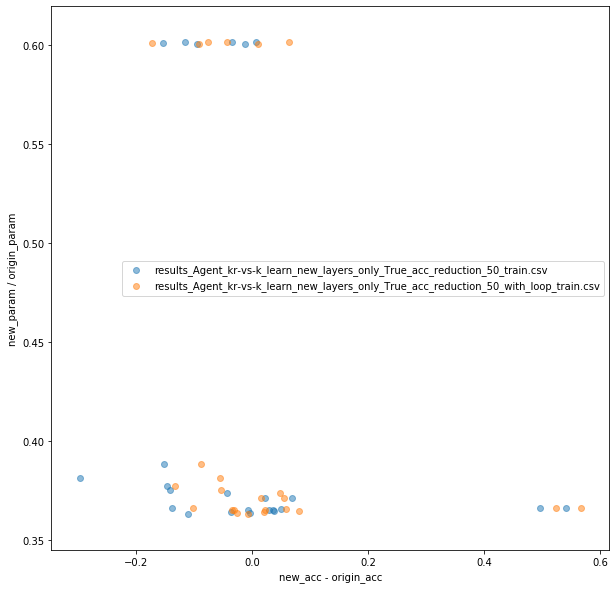

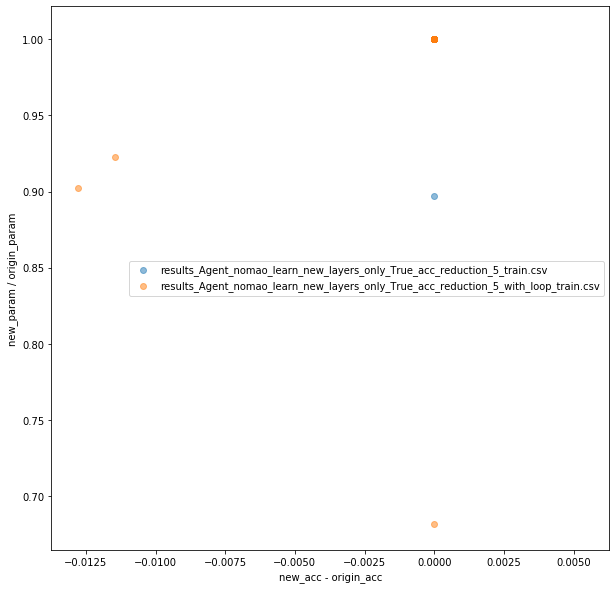

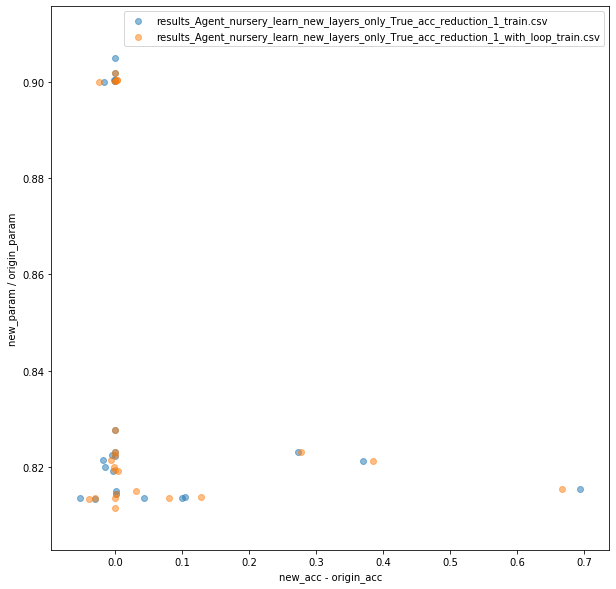

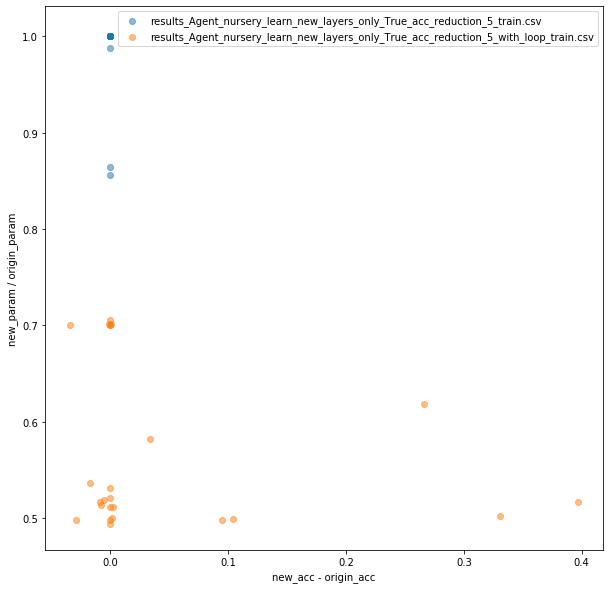

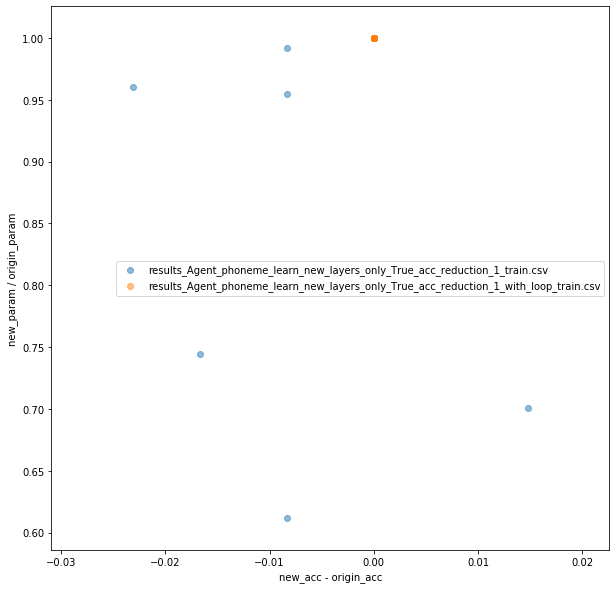

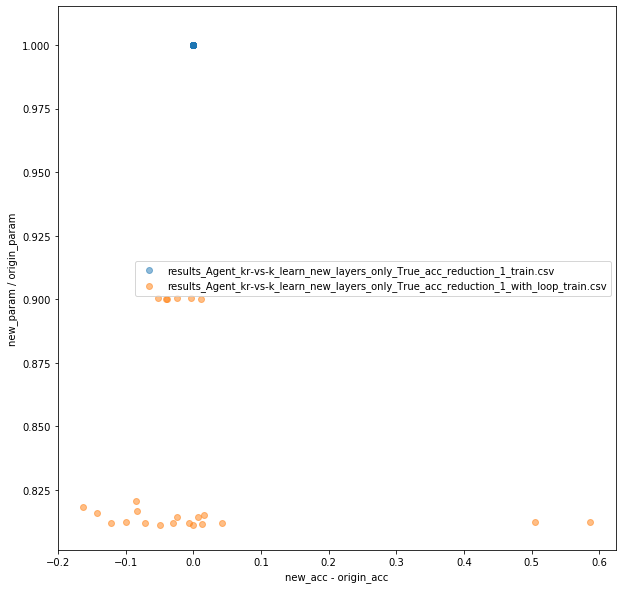

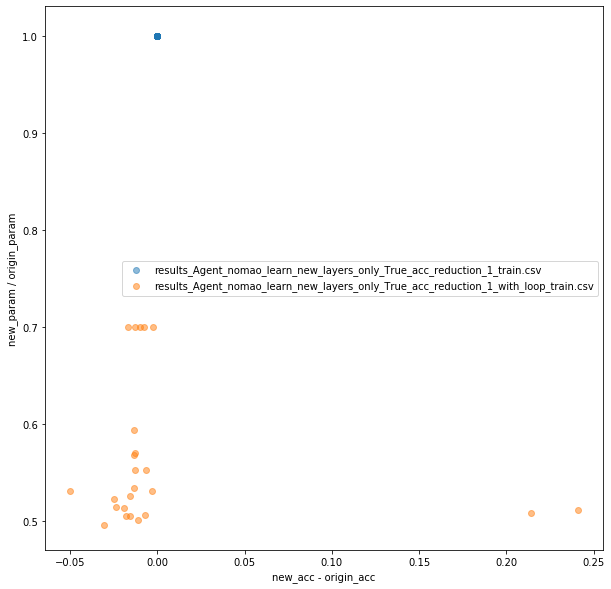

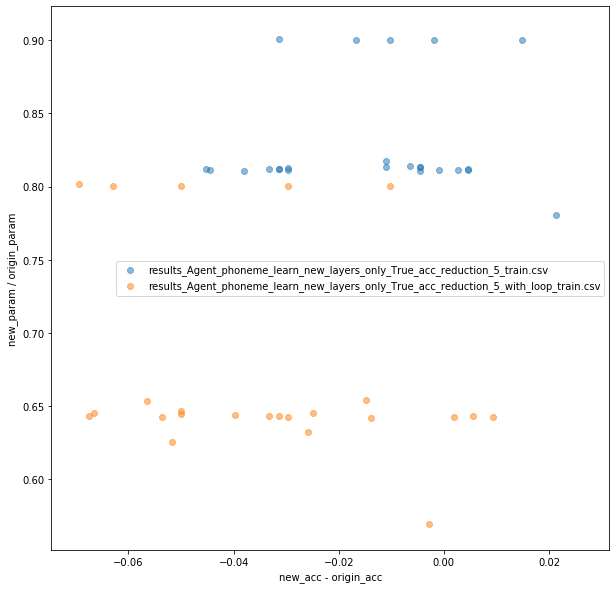

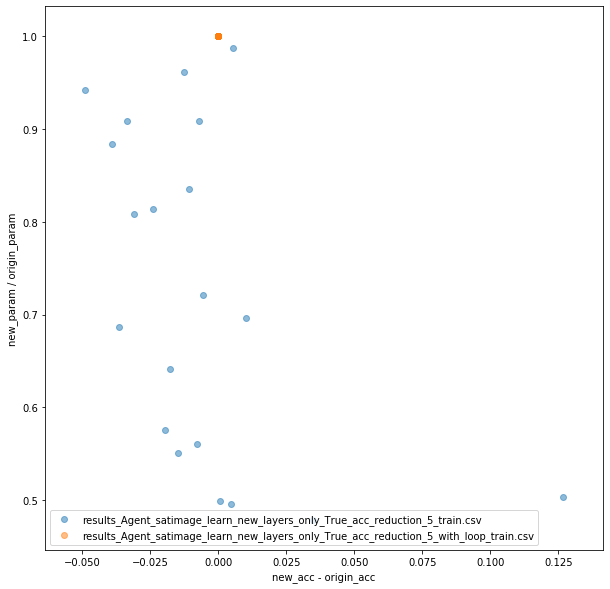

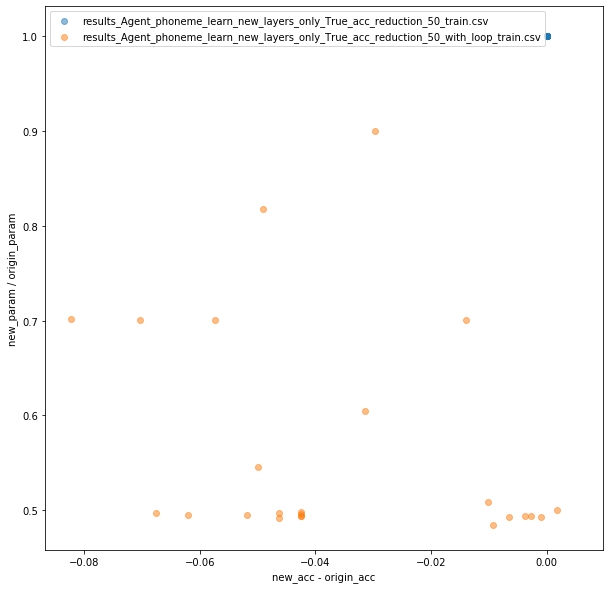

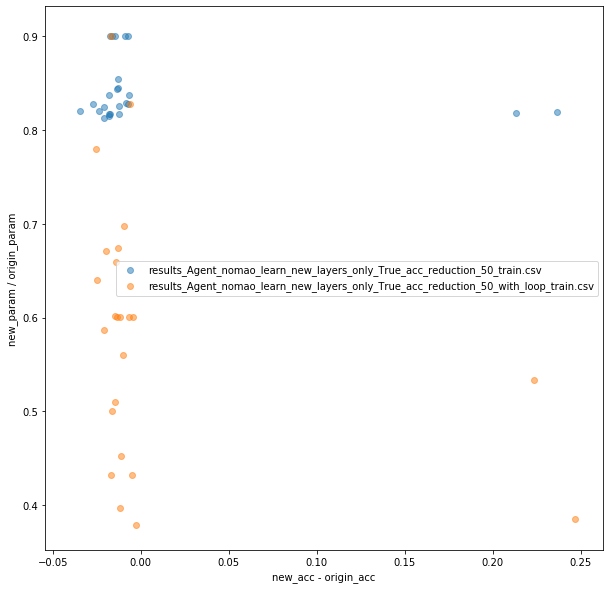

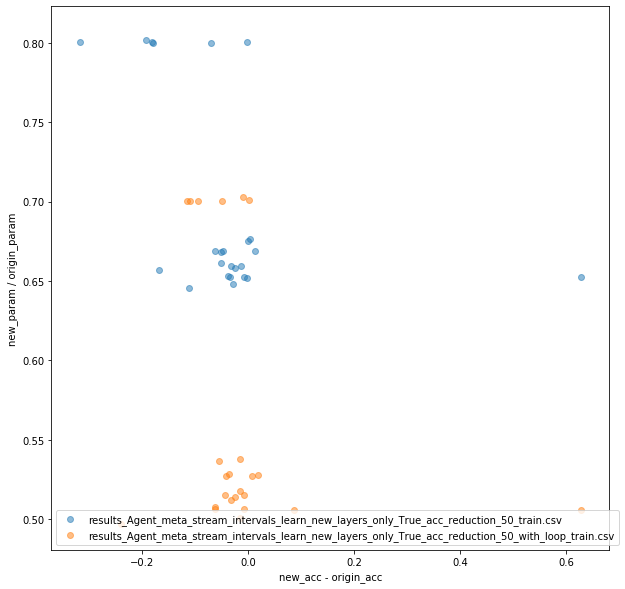

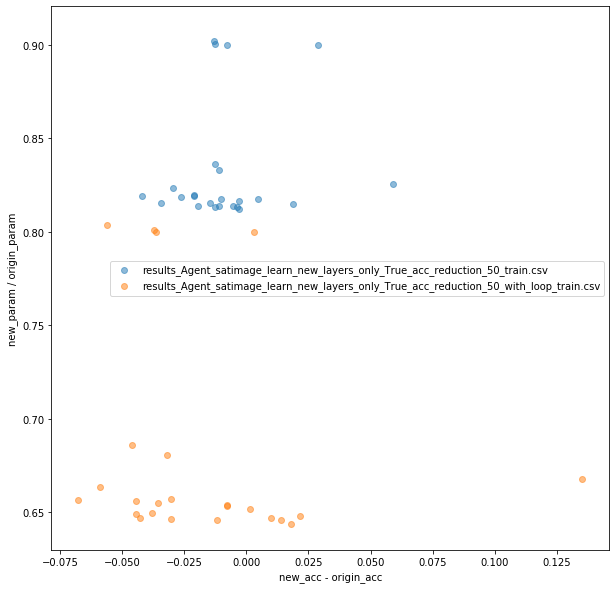

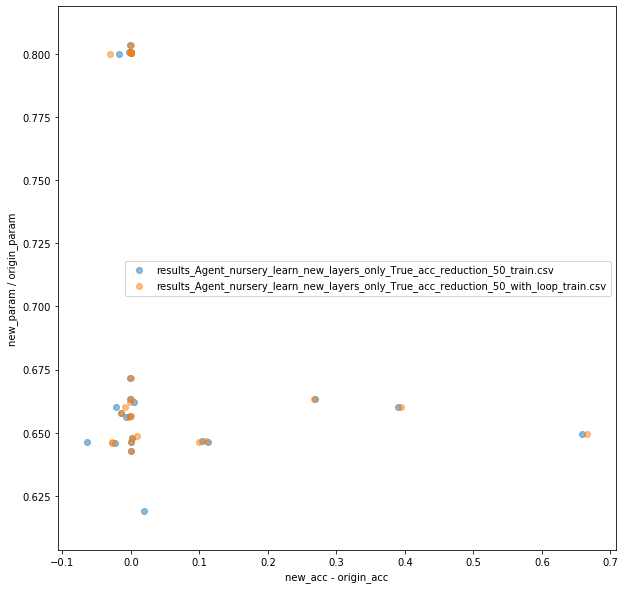

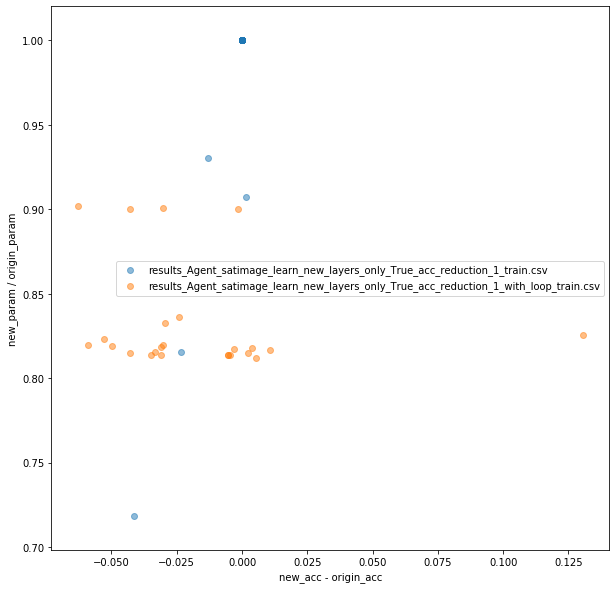

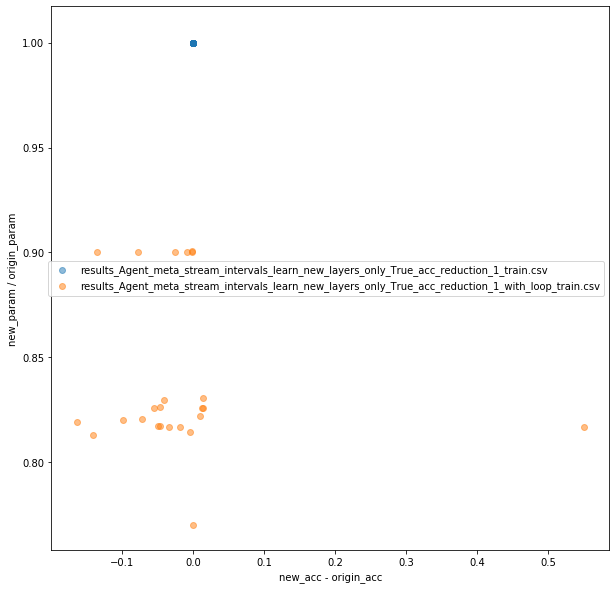

In [63]:
for curr_t in relevant_results_tuples_train:
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(10)

    ax.set_ylabel("new_param / origin_param")
    ax.set_xlabel("new_acc - origin_acc")
    
    for curr_res, name in sorted(curr_t, key = lambda x: x[1]):
        plot_acc_to_param(curr_res,name, ax)

    ax.legend()
plt.show()


In [15]:
results_by_dataset = {}

for curr_d in datasets:
    curr_dataset_results = list(filter(lambda x : curr_d in x[1], relevant_results))
    results_by_dataset[curr_d] = {}
    
    for curr_cv in cv:
        curr_dataset_cv_results = list(filter(lambda x: curr_cv in x[1], curr_dataset_results))
        results_by_dataset[curr_d][curr_cv] = {}
        
        curr_dataset_cv_results_combined = list(filter(lambda x :  'Combined' in x[1], curr_dataset_cv_results))
        curr_dataset_cv_results_not_combined = list(filter(lambda x :  'Combined' not in x[1], curr_dataset_cv_results))
        
        results_by_dataset[curr_d][curr_cv][True] = curr_dataset_cv_results_combined
        results_by_dataset[curr_d][curr_cv][False] = curr_dataset_cv_results_not_combined

In [58]:
def plot_acc_to_param(df, name, ax):
    accs = df['delta_acc']
    params = df['delta_param']
    ax.scatter(accs, params, label = name, alpha=0.5)
    pass

In [17]:
def plot_results_by_cv(curr_cv):
    print(f"Current CV -> {curr_cv}")
    print("---------------------------------------------------\n")

    for curr_d in datasets:
    #     print(f"Current Dataset : '{curr_d}'")
        fig, ax = plt.subplots()
        fig.set_figheight(10)
        fig.set_figwidth(10)
        ax.title.set_text(f"{curr_d}_f{dataset_to_feature_size[curr_d]}_s{dataset_to_size[curr_d]}")

        ax.set_ylabel("origin_param - new_param")
        ax.set_xlabel("new_acc - origin_acc")


        for curr_res,name in sorted(results_by_dataset[curr_d][curr_cv][False], key = lambda x: x[1]):
            plot_acc_to_param(curr_res,name, ax)

        ax.legend()
    #     ax.
    #     print("===================================================")

    plt.show()

Current CV -> train
---------------------------------------------------



/home/liorhi/.conda/envs/liorhi_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
No handles with labels found to put in legend.


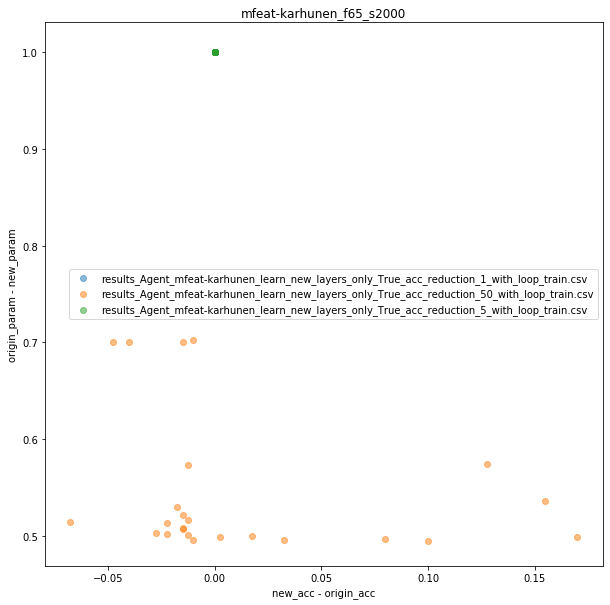

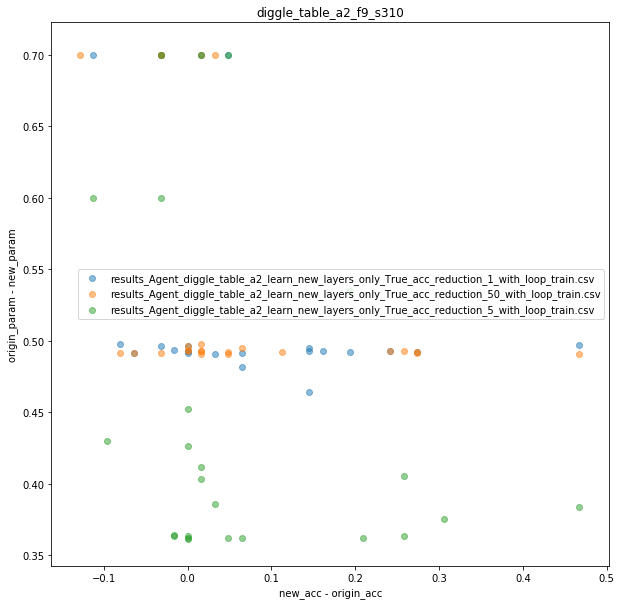

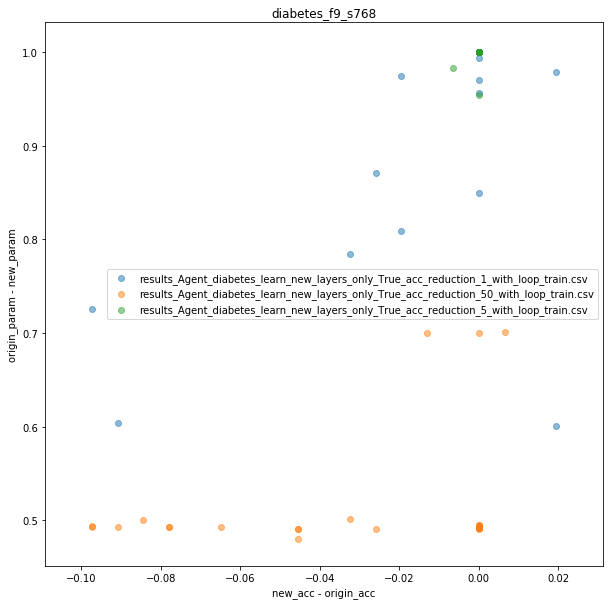

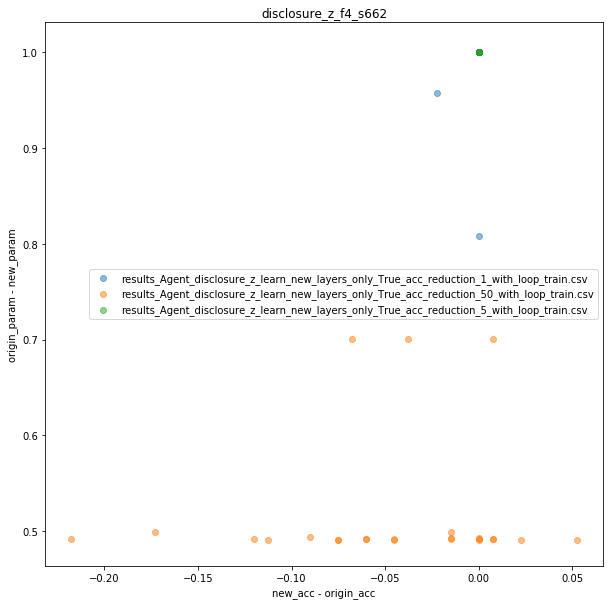

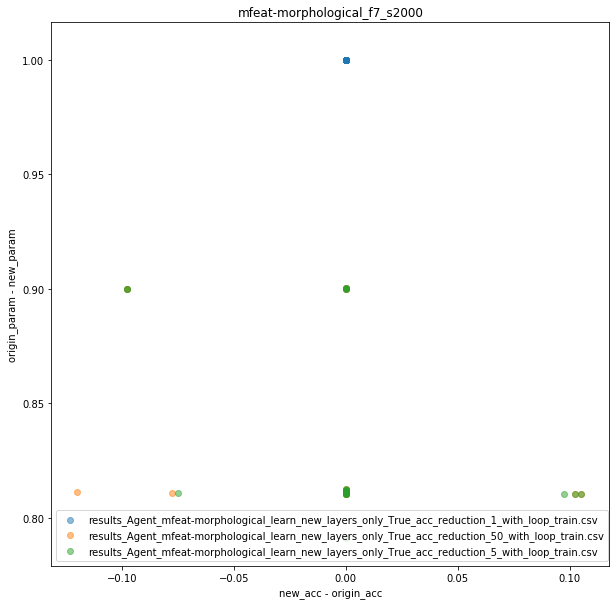

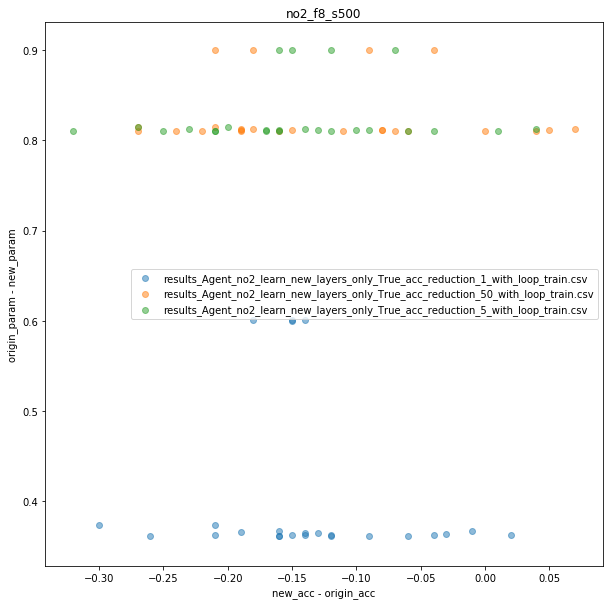

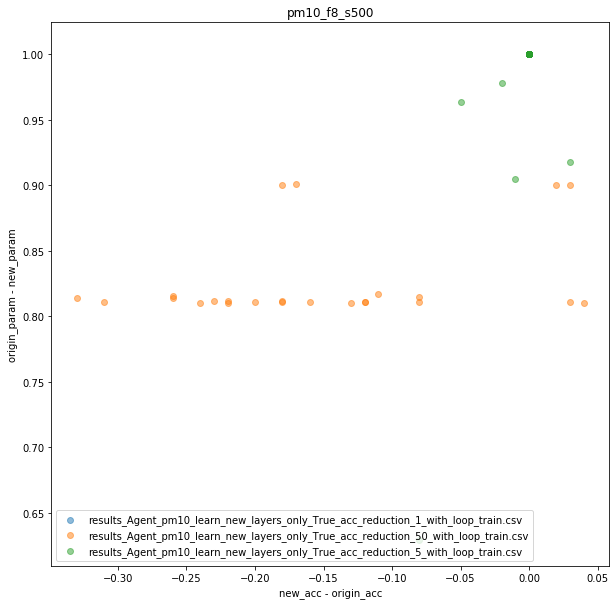

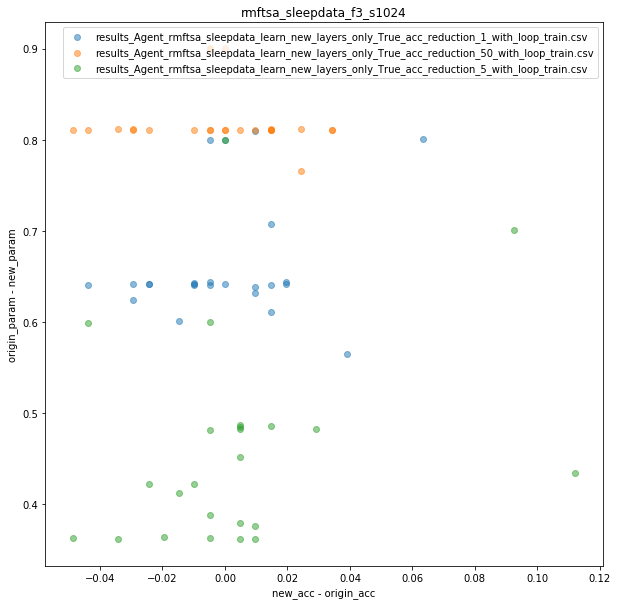

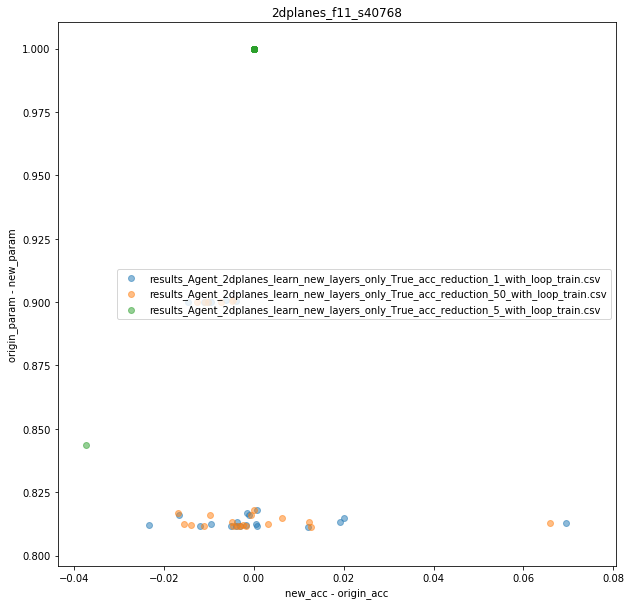

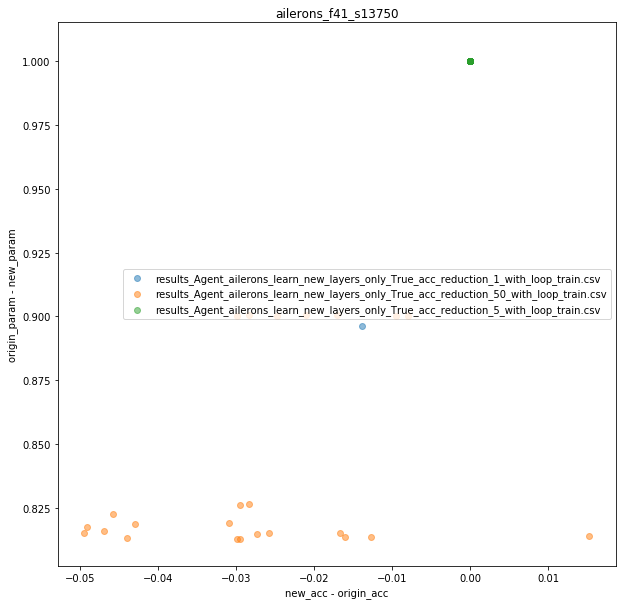

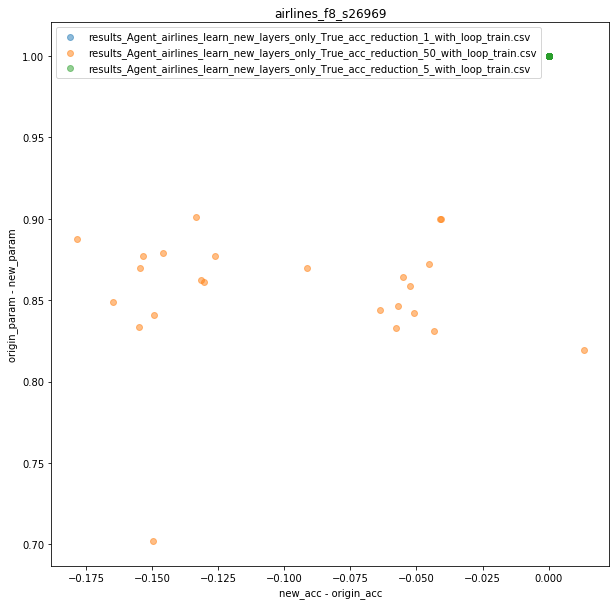

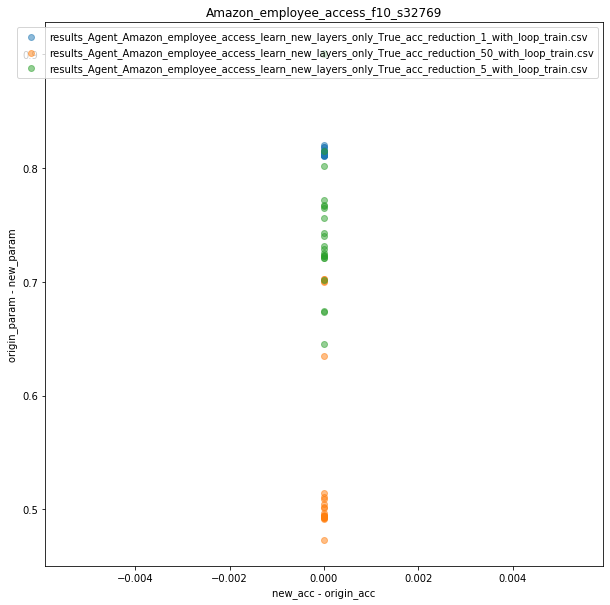

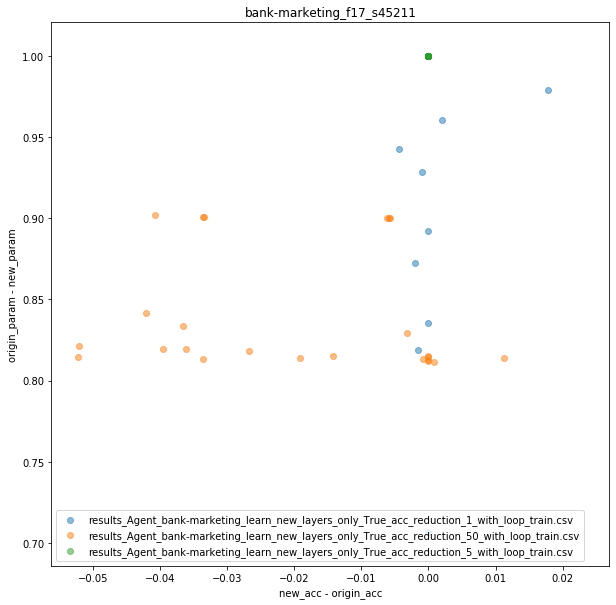

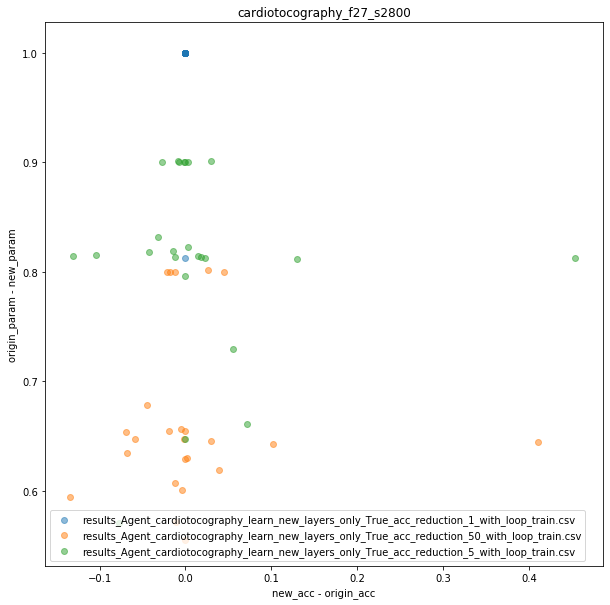

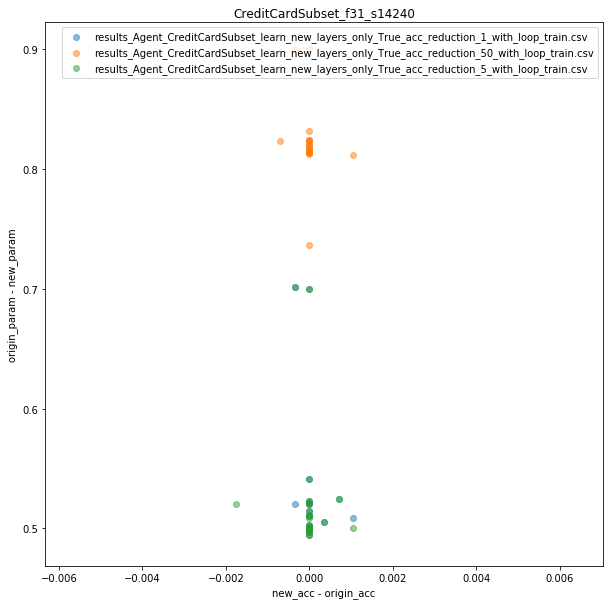

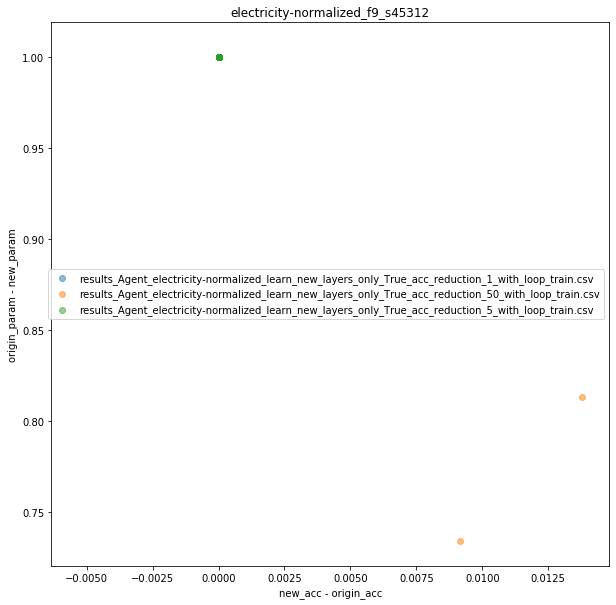

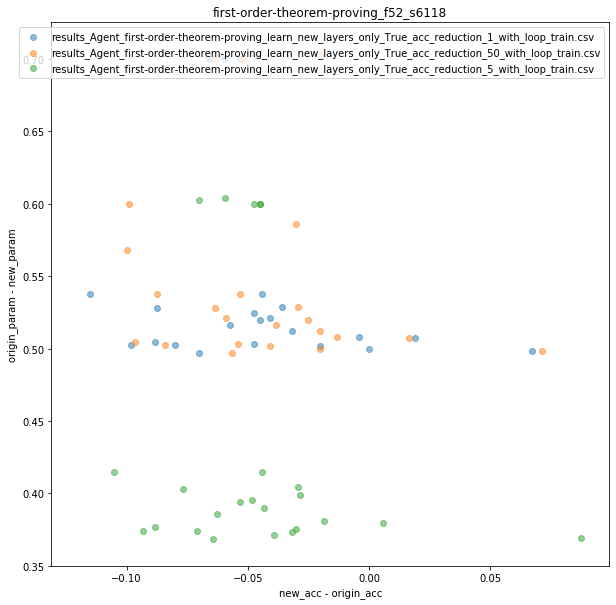

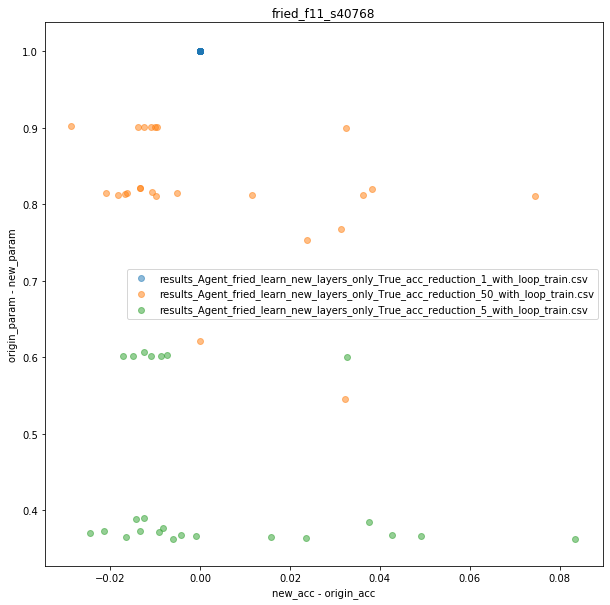

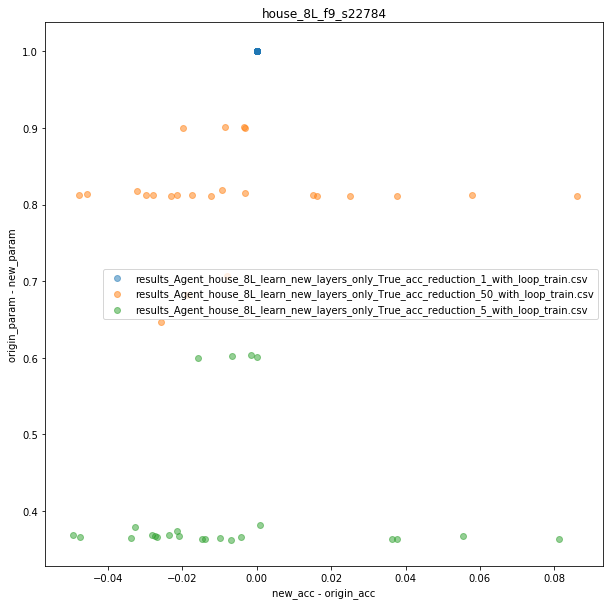

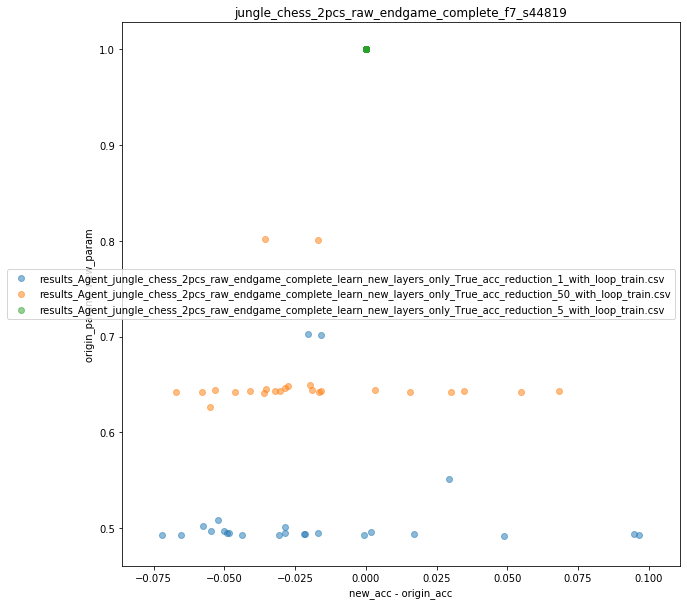

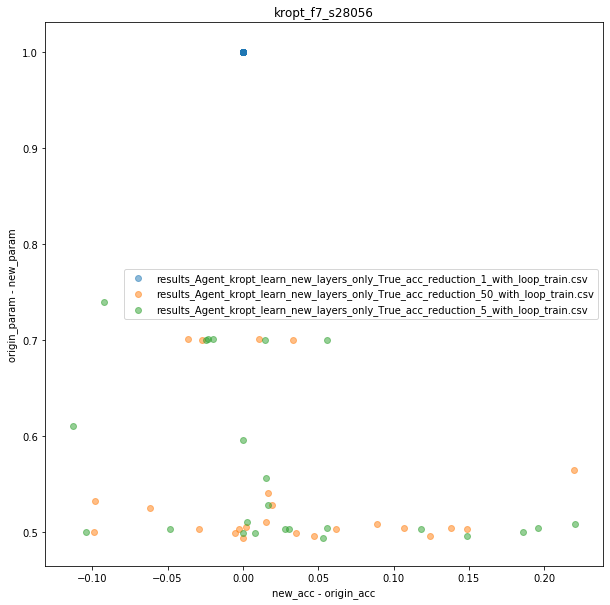

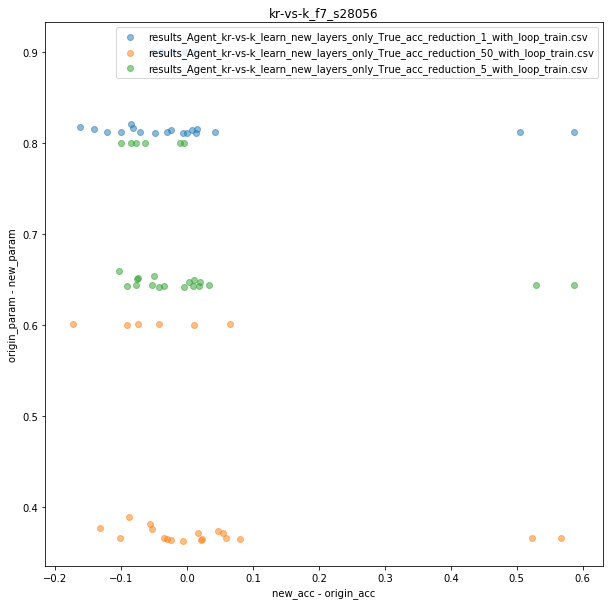

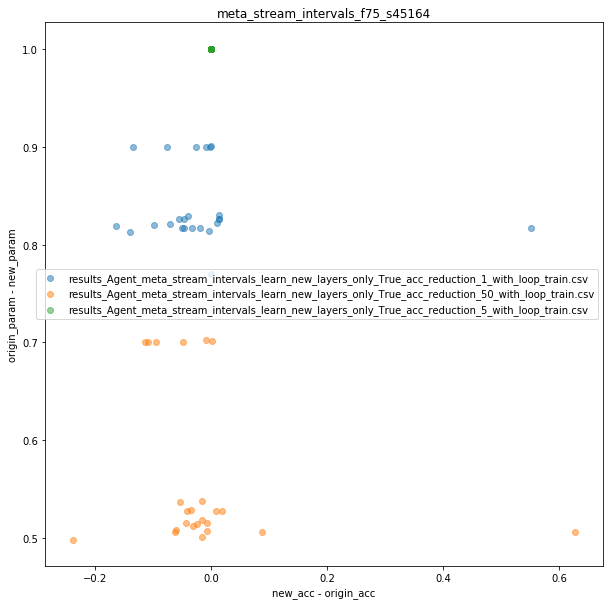

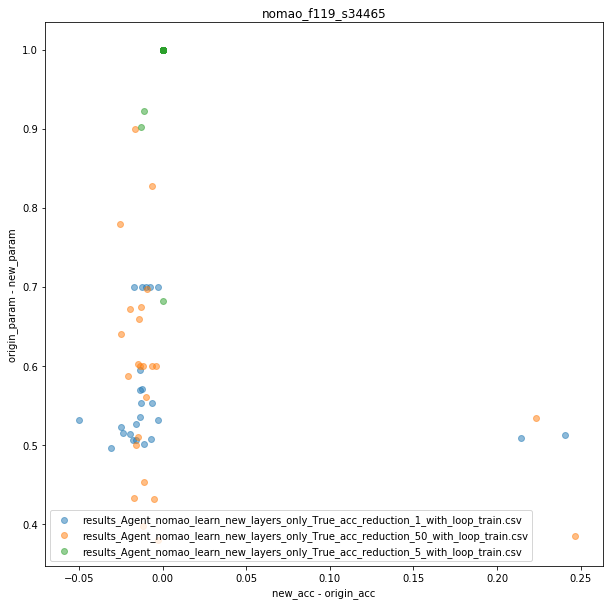

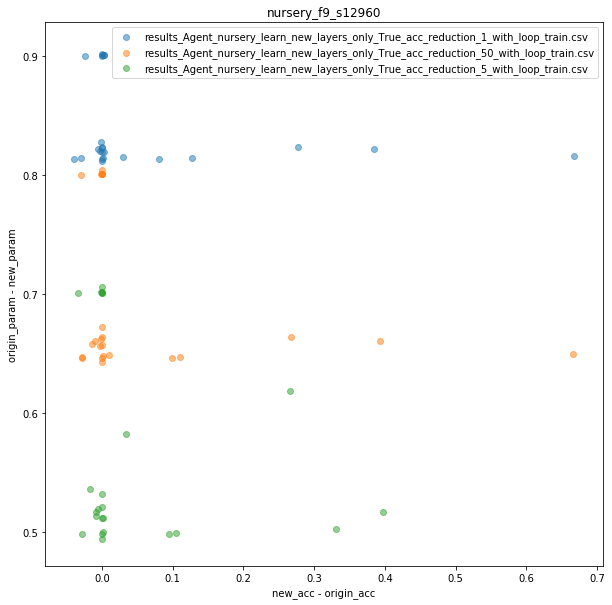

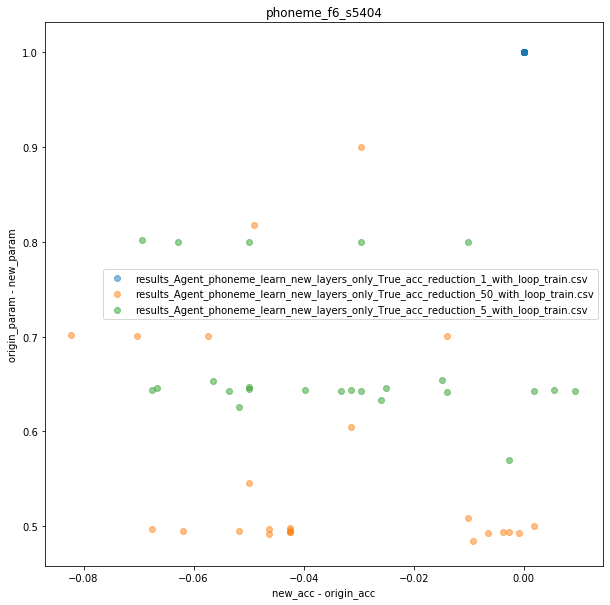

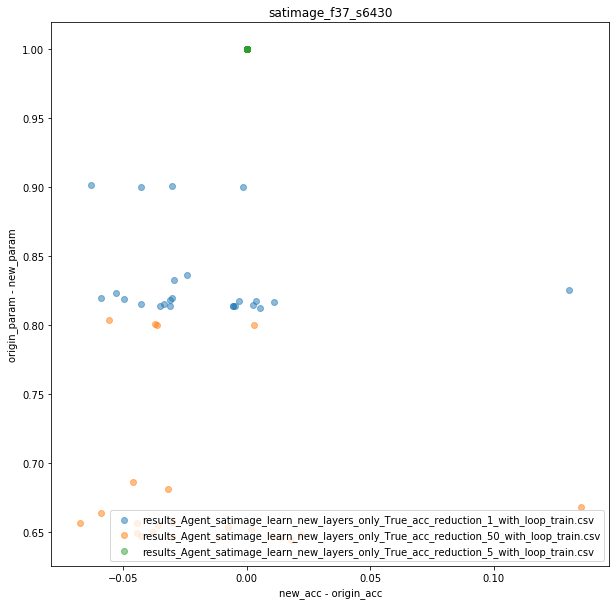

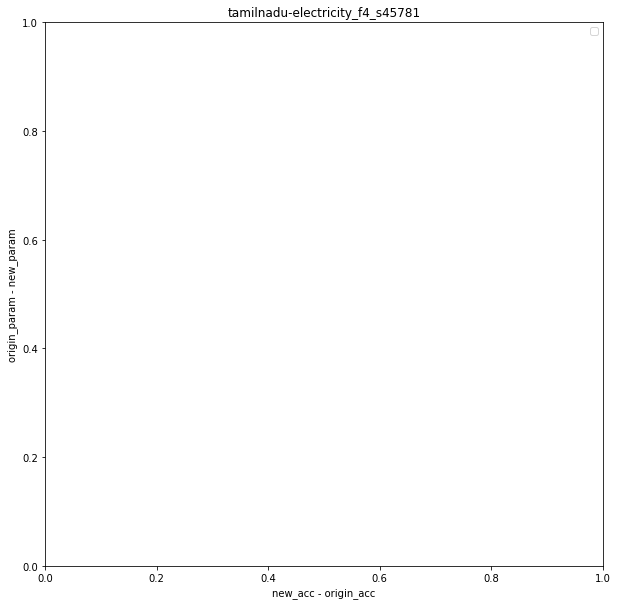

In [18]:
plot_results_by_cv("train")

Current CV -> test
---------------------------------------------------



/home/liorhi/.conda/envs/liorhi_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
No handles with labels found to put in legend.


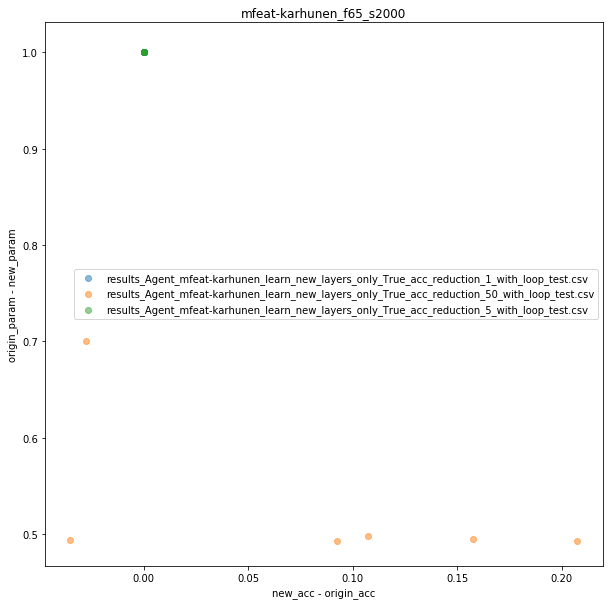

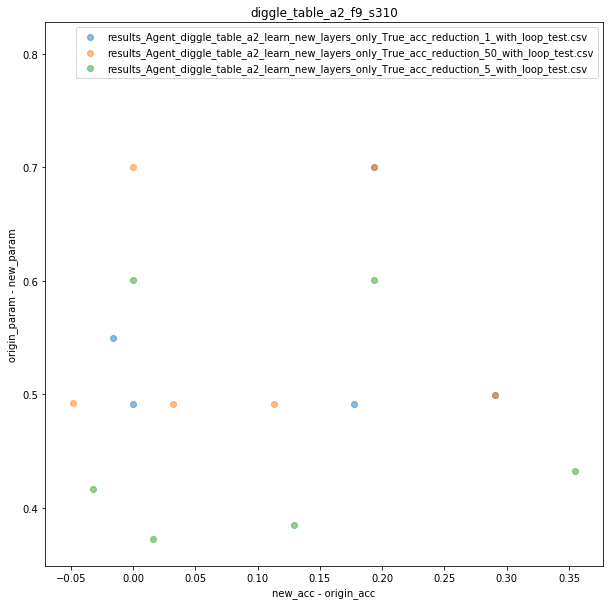

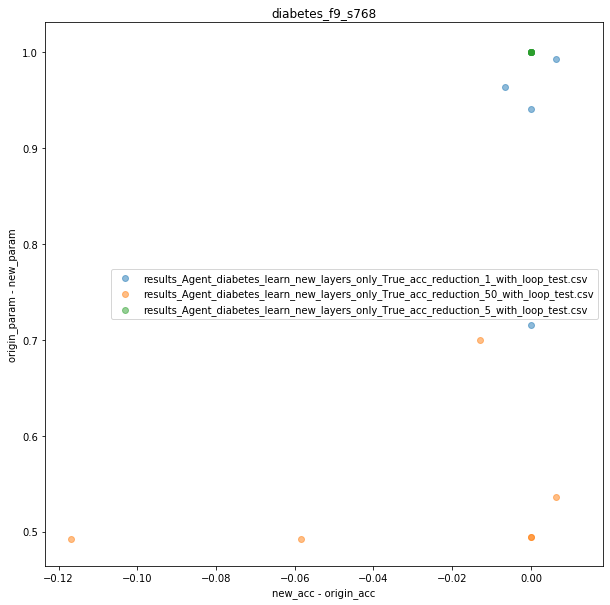

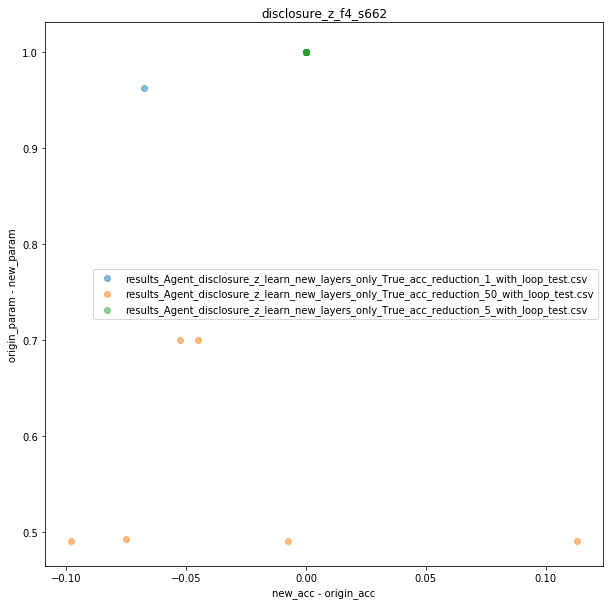

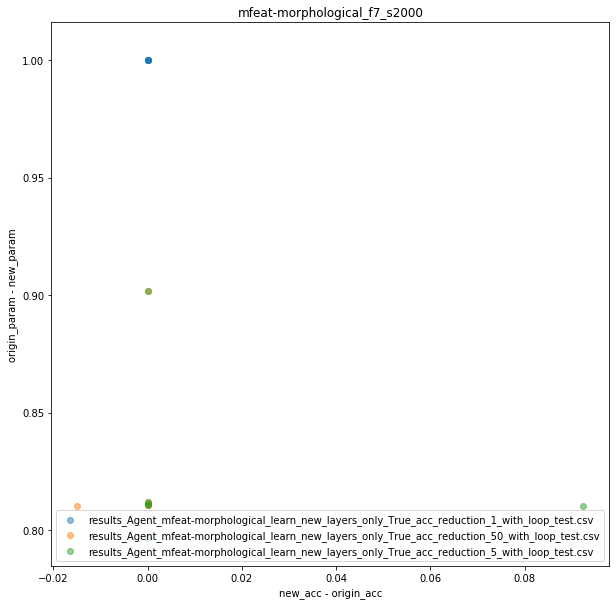

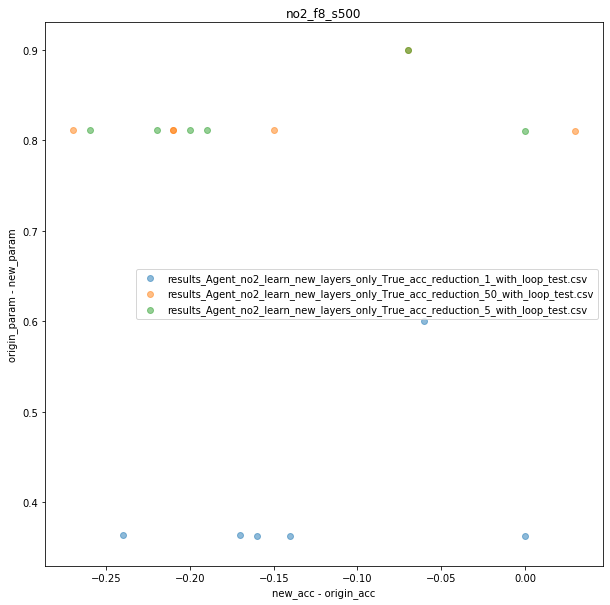

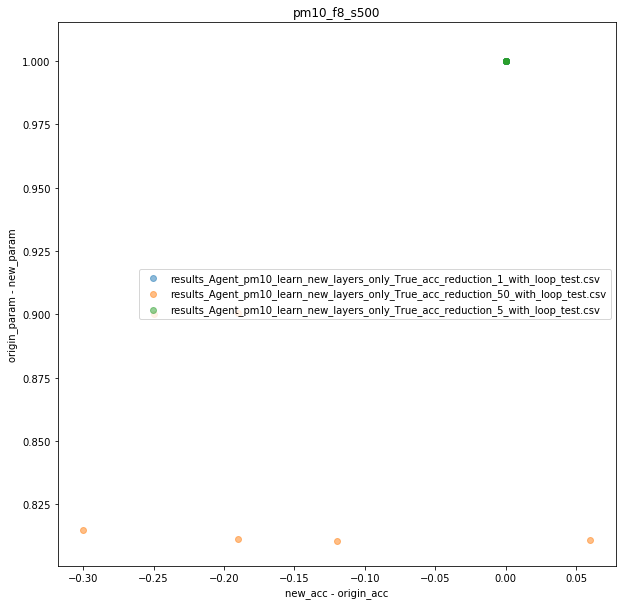

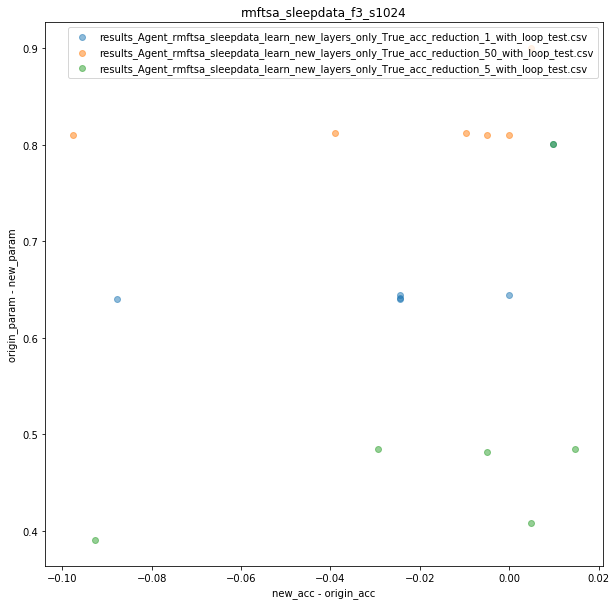

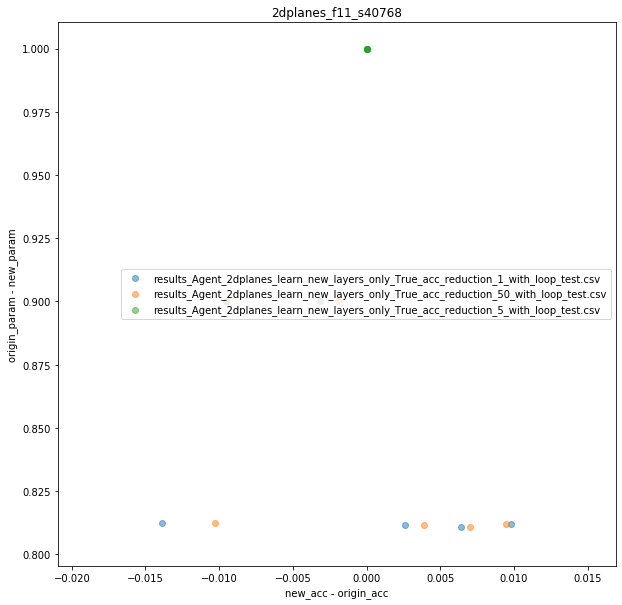

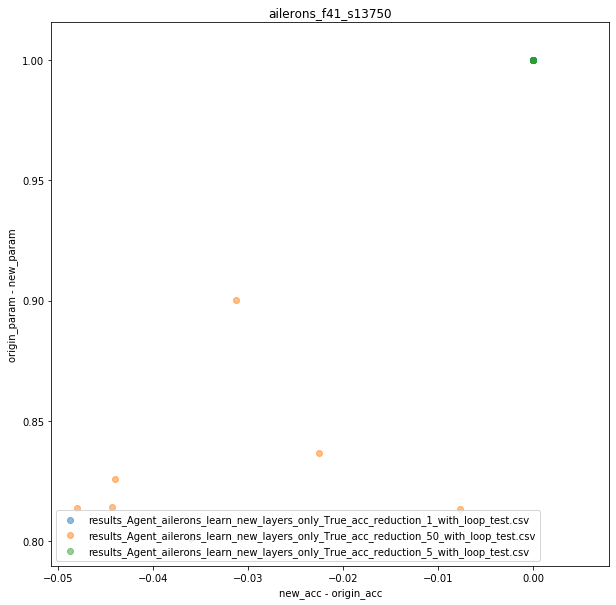

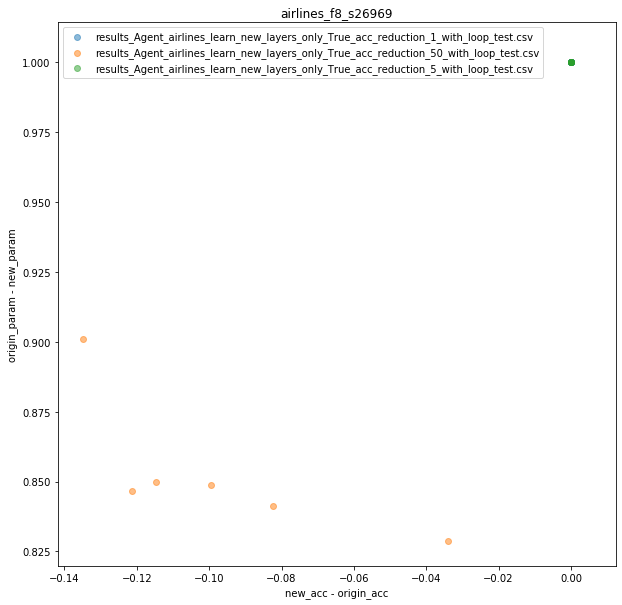

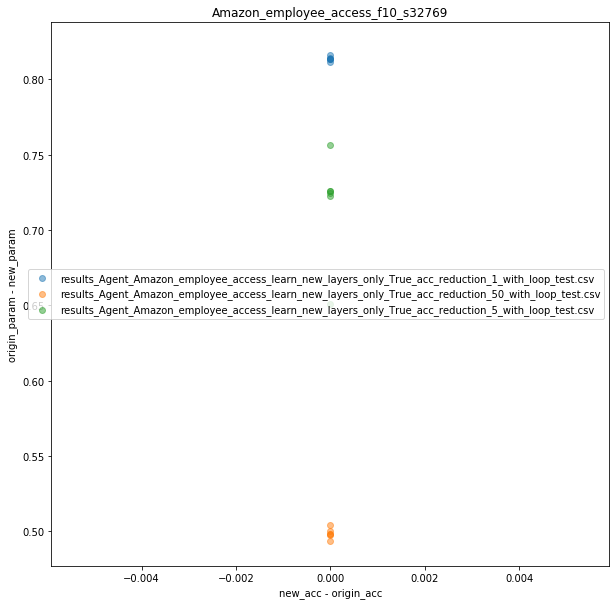

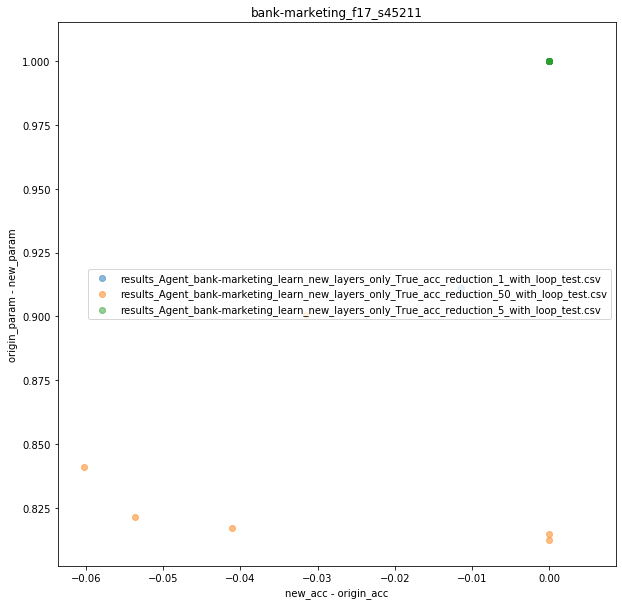

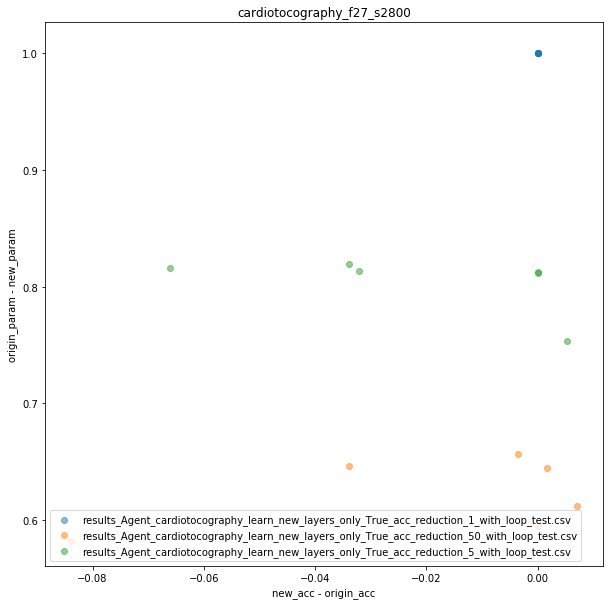

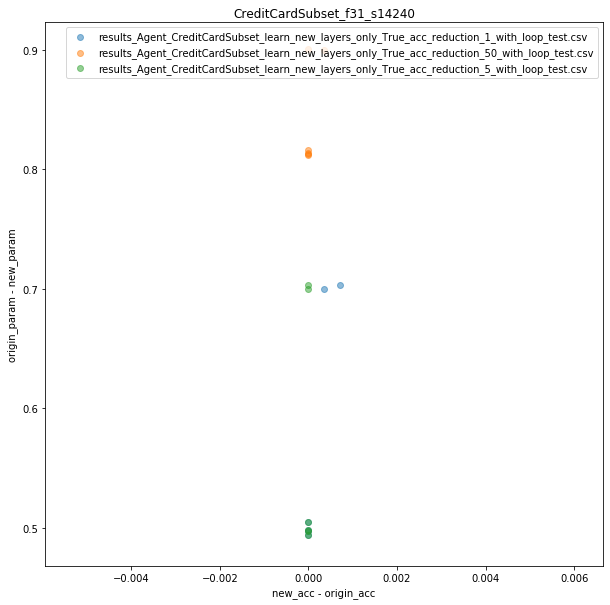

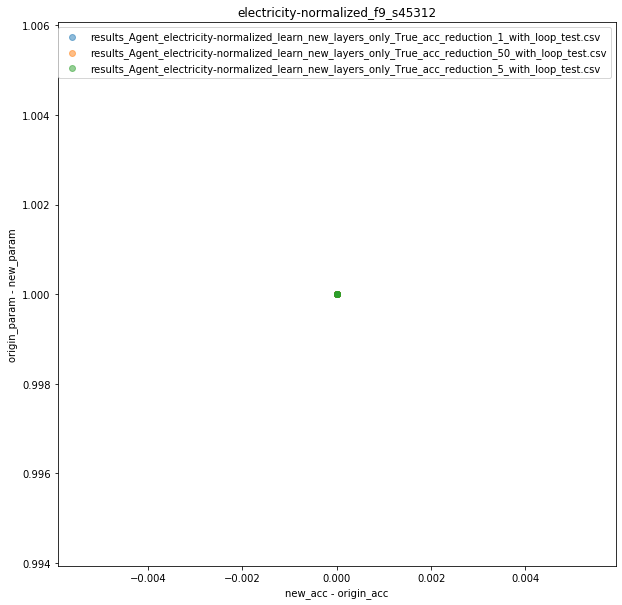

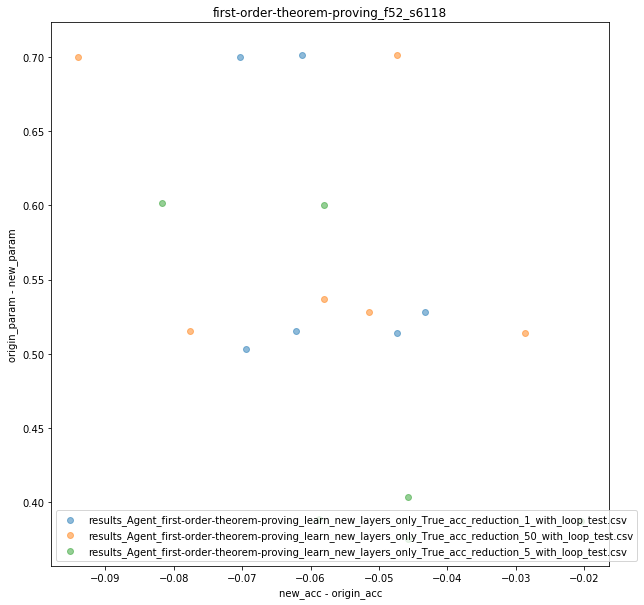

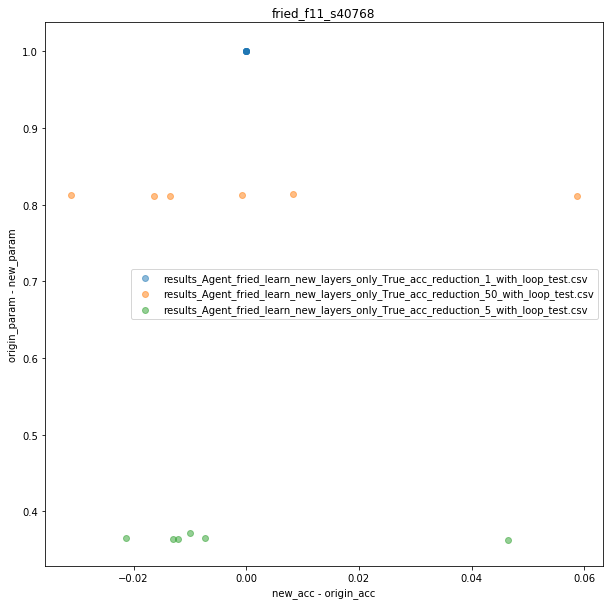

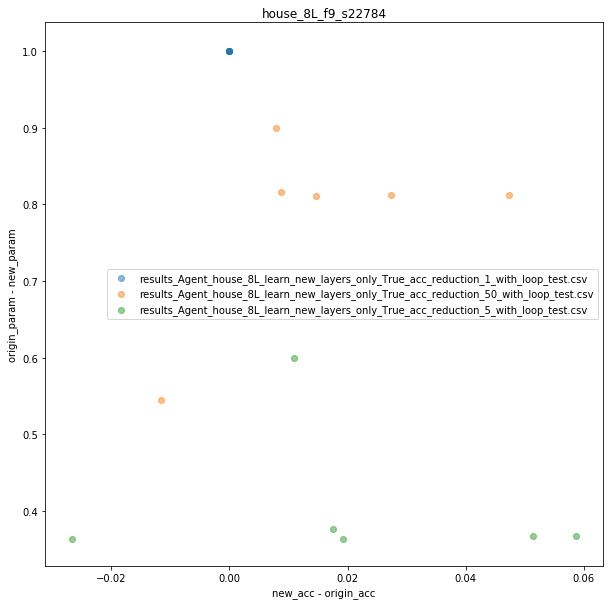

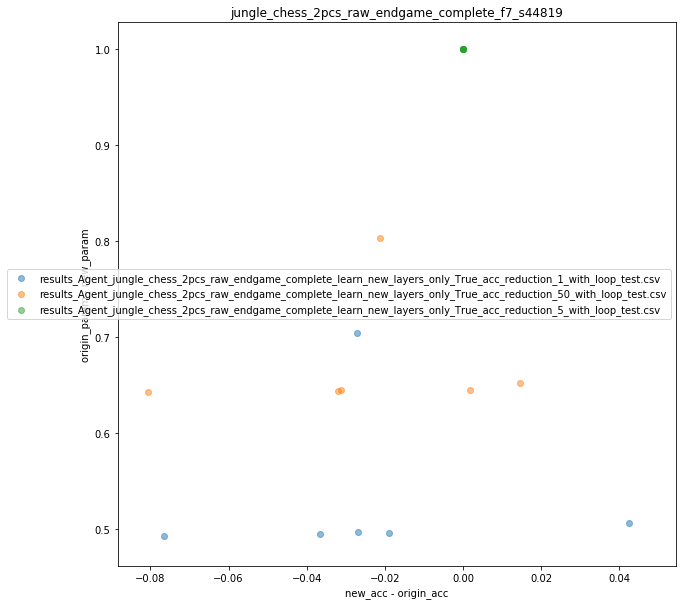

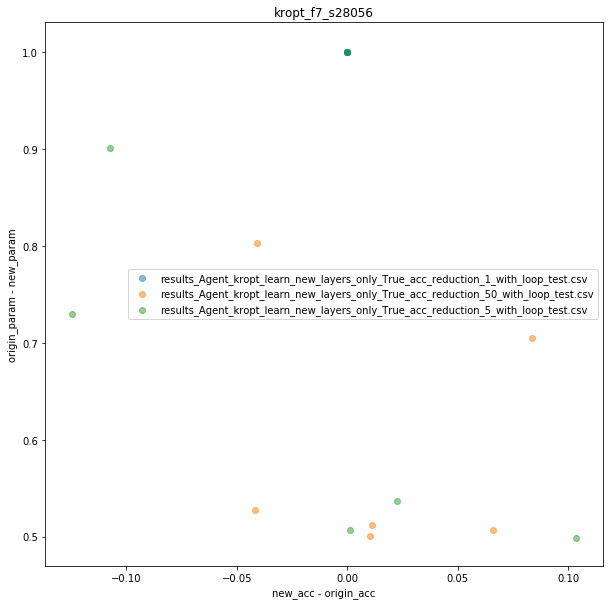

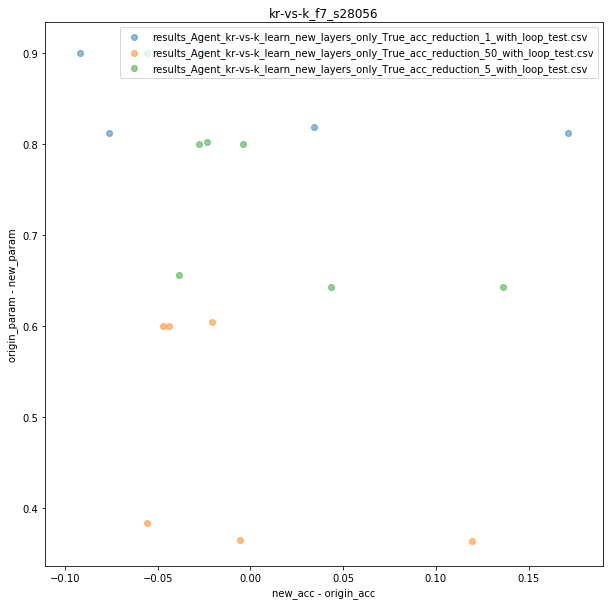

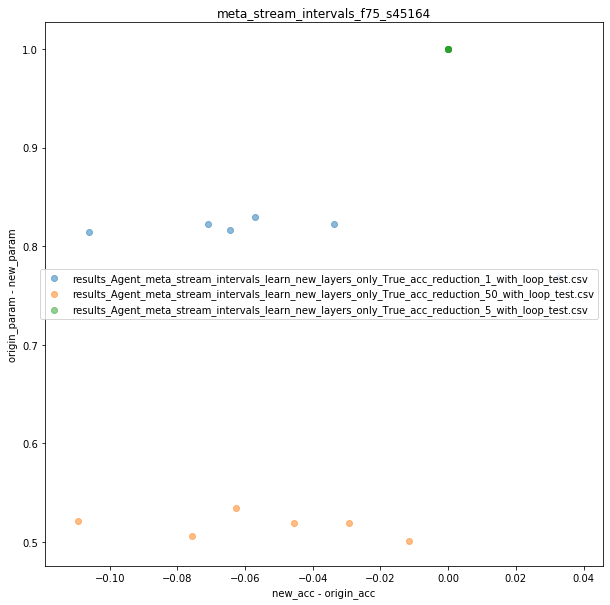

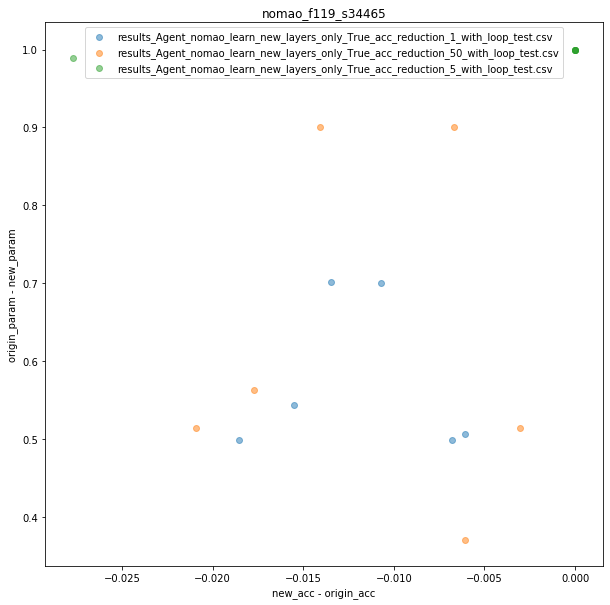

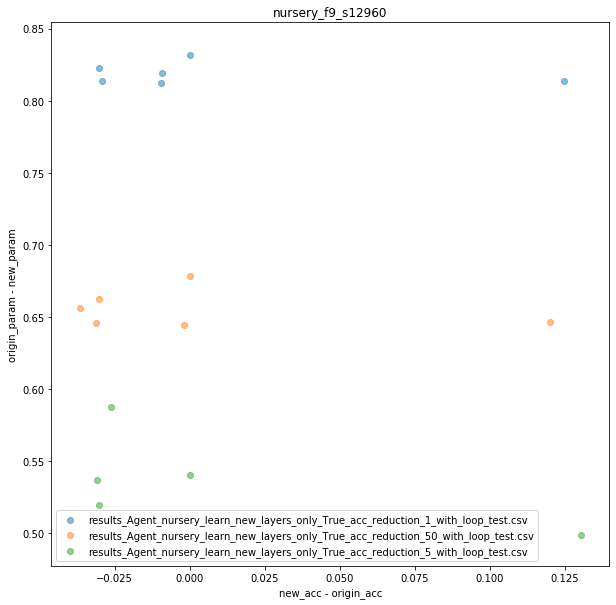

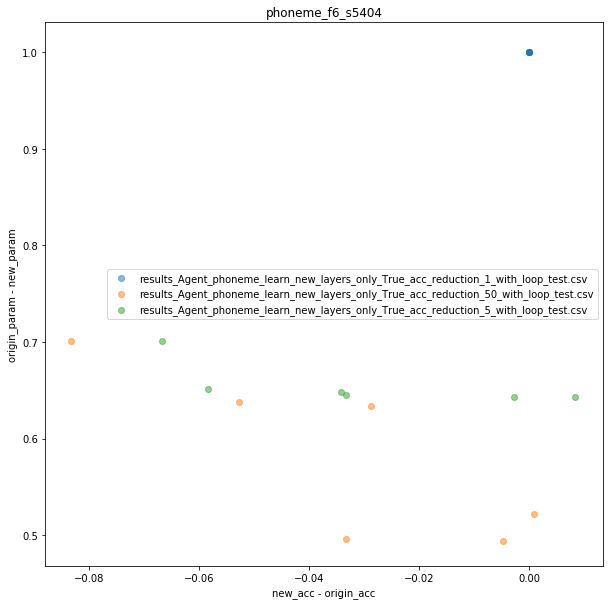

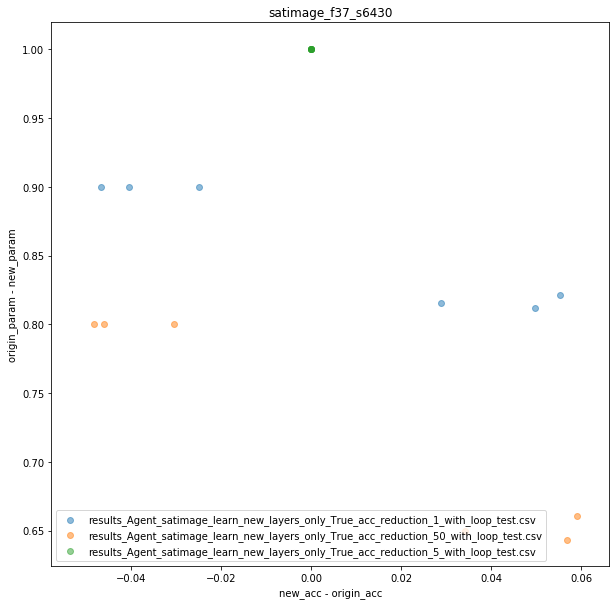

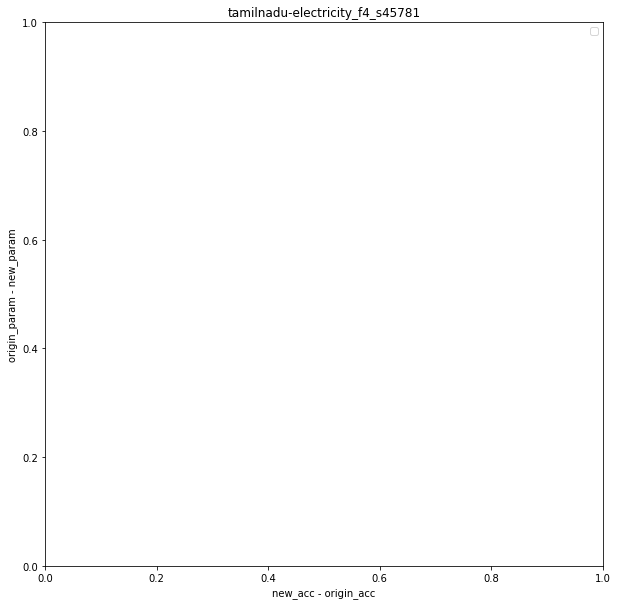

In [19]:
plot_results_by_cv('test')

In [ ]:
import pprint
names = []
def show_sum_acc(filter_func, title = ''):
    accs = []
    filtered = filter(filter_func, relevant_results)
    for r, name in filtered:
        names.append(name)
        accs.append(r.delta_acc.mean())
        
    id_to_name = dict(zip(names, range(len(names))))
    pp = pprint.PrettyPrinter()
    pp.pprint(id_to_name)
    ids = list(map(str,map(id_to_name.get, names)))
    plt.title(title)
    plt.bar(ids, accs)
    plt.xlabel("Result Name")
    plt.ylabel("delta Acc")
    plt.show()

In [ ]:
for d in datasets:
    print(f"Dataset => {d}")
    for curr_cv in cv:
        show_sum_acc(lambda x : curr_cv in x[1] and d in x[1] in x[1], 
                     title = f'delta accuracy for {d} dataset, {curr_cv}')
    print("==========================================")

In [ ]:
import pprint

def show_sum_param(filter_func, title = ''):
    accs = []
    names = []

    filtered = filter(filter_func, relevant_results)
    for r, name in filtered:
        names.append(name)
        accs.append(r.delta_param.mean())
        
    id_to_name = dict(zip(names, range(len(names))))
    pp = pprint.PrettyPrinter()
    pp.pprint(id_to_name)
    ids = list(map(str,map(id_to_name.get, names)))
    plt.title(title)
    plt.bar(ids, accs)
    plt.xlabel("Result Name")
    plt.ylabel("delta param")
    plt.show()

In [ ]:
for d in datasets:
    print(f"Dataset => {d}")
    for curr_cv in cv:
        show_sum_param(lambda x : curr_cv in x[1] and d in x[1] in x[1], 
                     title = f'delta param for {d} dataset, {curr_cv}')
    print("==========================================")

In [ ]:
for curr_dataset in datasets:
    print(f"Dataset - {curr_dataset}")
    for curr_cv in cv:
        print(f"CV - {curr_cv}")
# curr_dataset = datasets[0]
# curr_cv = 'train'
        curr_cv_datasets = list(filter(lambda x : curr_cv in x[1] and curr_dataset in x[1], relevant_results))
        number_of_models = curr_cv_datasets[0][0].shape[0]
        agents = list(map(lambda x: x[1], curr_cv_datasets))
        id_to_name = dict(zip(names, range(len(agents))))
        pp = pprint.PrettyPrinter()
        pp.pprint(id_to_name)
        ids = list(map(str,map(id_to_name.get, agents)))

        for curr_model_idx in range(number_of_models):
            print("Origin model architecture => ", curr_cv_datasets[0][0].iloc[curr_model_idx].origin_model_arch)

            all_relevant_rows = list(map(lambda x: x[0].iloc[curr_model_idx].delta_acc, curr_cv_datasets))
            title = f'all models delta accuracies {curr_dataset} dataset {curr_cv}'

            plt.bar(ids, all_relevant_rows)
            plt.xlabel("agent id")
            plt.ylabel("delta accuracy")
            plt.title(title)
            plt.show()

In [ ]:
for curr_dataset in datasets:
    print(f"Dataset - {curr_dataset}")
    for curr_cv in cv:
        print(f"CV - {curr_cv}")
# curr_dataset = datasets[0]
# curr_cv = 'train'
        curr_cv_datasets = list(filter(lambda x : curr_cv in x[1] and curr_dataset in x[1], relevant_results))
        number_of_models = curr_cv_datasets[0][0].shape[0]
        agents = list(map(lambda x:x[1], curr_cv_datasets))
        id_to_name = dict(zip(names, range(len(agents))))
        pp = pprint.PrettyPrinter()
        pp.pprint(id_to_name)
        ids = list(map(str,map(id_to_name.get, agents)))

        for curr_model_idx in range(number_of_models):
            print("Origin model architecture => ", curr_cv_datasets[0][0].iloc[curr_model_idx].origin_model_arch)

            all_relevant_rows = list(map(lambda x: x[0].iloc[curr_model_idx].delta_param, curr_cv_datasets))
            title = f'all models delta param {curr_dataset} dataset {curr_cv}'

            plt.bar(ids, all_relevant_rows)
            plt.xlabel("agent id")
            plt.ylabel("delta param")
            plt.title(title)
            plt.show()